In [ ]:
!nvidia-smi

Wed Mar 24 05:03:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    22W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
!gdown --id 129ruKo5e03Uwx7El5iZfXvbJVsojrav9
!gdown --id 12L9rI_Iaz36ztXeBM5662IraTICOWHsV
!gdown --id 1H-dhrytDv4MqUKTeE4ZCooHB2CwyMmZs
!gdown --id 1TqaRC5FY0agW4ItuG34yq4kGFKhf6gqb
!gdown --id 1Z1sG0dUuzutCBYoRP8bD3FXplK3RbSoV
!gdown --id 1-3pW4BzMfaDRwvoqal6IMD6E95cDlwsS
!mkdir state_dicts
!mv /content/vgg13_bn.pt /content/state_dicts/
!mv /content/resnet18.pt /content/state_dicts/

Downloading...
From: https://drive.google.com/uc?id=129ruKo5e03Uwx7El5iZfXvbJVsojrav9
To: /content/vgg.py
100% 4.83k/4.83k [00:00<00:00, 8.11MB/s]
Downloading...
From: https://drive.google.com/uc?id=12L9rI_Iaz36ztXeBM5662IraTICOWHsV
To: /content/vgg13_bn.pt
113MB [00:00, 241MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1H-dhrytDv4MqUKTeE4ZCooHB2CwyMmZs
To: /content/model.pth
44.1MB [00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TqaRC5FY0agW4ItuG34yq4kGFKhf6gqb
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 101kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z1sG0dUuzutCBYoRP8bD3FXplK3RbSoV
To: /content/resnet.py
100% 9.30k/9.30k [00:00<00:00, 14.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3pW4BzMfaDRwvoqal6IMD6E95cDlwsS
To: /content/resnet18.pt
44.8MB [00:00, 117MB/s] 


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/swaroopkml/cifar10-pngs-in-folders")
use_cuda=True

 20%|█▉        | 28.0M/140M [00:00<00:00, 291MB/s]

100%|██████████| 140M/140M [00:00<00:00, 303MB/s]


In [ ]:
!pip install pytorch-lightning

     |████████████████████████████████| 829kB 12.1MB/s 
     |████████████████████████████████| 112kB 29.5MB/s 
     |████████████████████████████████| 829kB 17.2MB/s 
     |████████████████████████████████| 276kB 52.5MB/s 
     |████████████████████████████████| 1.3MB 48.2MB/s 
     |████████████████████████████████| 296kB 50.3MB/s 
     |████████████████████████████████| 143kB 52.4MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=9ccf62eb4db9e09c6594326e244e3d1b2bedb8c577ee86548f1bb188c5383c6d
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=19d1cd28bdbe67ab3456bef754c054f3015bedb72240f8dd028c74d885da54af
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built future PyYAML
  Found existing installation: future 0.16.0
  

In [ ]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder
import os
from tqdm.notebook import tqdm
from torchvision.utils import make_grid
from torchvision import models
import pickle

In [ ]:
# CIFAR10 Test dataset and dataloader declaration
batch_size_69=256

train_loader = torch.utils.data.DataLoader(
                ImageFolder('/content/cifar10-pngs-in-folders/cifar10/cifar10/train',  
                        transform=transforms.Compose([ transforms.ToTensor()])),
                        batch_size=batch_size_69, 
                        shuffle=True,
                        num_workers=2,
                        pin_memory=True)

test_loader = torch.utils.data.DataLoader(
                ImageFolder('/content/cifar10-pngs-in-folders/cifar10/cifar10/test', 
                        transform=transforms.Compose([ transforms.ToTensor() ])),
                        batch_size=batch_size_69)

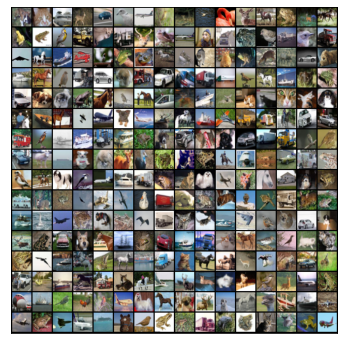

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

show_batch(train_loader)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True) #EXPLAIN!!!


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))


In [ ]:
from vgg import vgg13_bn
from resnet import resnet18

class vgg13(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = vgg13_bn(pretrained=True)
        #self.network.eval()
        
    def forward(self,images):
        return self.network(images)

class resnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = resnet18(pretrained=True)
        #self.network.eval()
        
    def forward(self,images):
        return self.network(images)


In [ ]:
# vgg = ResNet18(3,10)
# vgg.load_state_dict(torch.load("model.pth"))

In [ ]:
device = get_default_device()
discriminator_2 = to_device( vgg13(), device)
classifier = to_device( resnet(), device)
train_loader = DeviceDataLoader(train_loader, device)
test_loader =  DeviceDataLoader(test_loader, device)

In [ ]:
@torch.no_grad()
def evaluate(model , val_loader, val=True):
    if val:
        model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

print("discriminator_2 Train Accuracy: ",evaluate(discriminator_2 , train_loader, val=False) )
print("discriminator_2 Test  Accuracy: ",evaluate(discriminator_2 , test_loader))

print("classifier Train Accuracy : ",evaluate(classifier, train_loader, val=False))
print("classifier Test  Accuracy : ",evaluate(classifier, test_loader) )


discriminator_2 Train Accuracy:  {'val_loss': 0.03796946629881859, 'val_acc': 0.9950773119926453}



discriminator_2 Test  Accuracy:  {'val_loss': 0.2239495813846588, 'val_acc': 0.9327148199081421}



classifier Train Accuracy :  {'val_loss': 0.04233004152774811, 'val_acc': 0.993315577507019}



classifier Test  Accuracy :  {'val_loss': 0.2716706395149231, 'val_acc': 0.923144519329071}


In [ ]:
class UNet(torch.nn.Module):

  def unet_conv(self , ch_in , ch_out , is_leaky):
    if is_leaky:
      return nn.Sequential(
          nn.Conv2d(ch_in , ch_out , 3 , padding=1),
          nn.BatchNorm2d(ch_out),
          nn.LeakyReLU(0.2)
      )
    else:
      return nn.Sequential(
          nn.Conv2d(ch_in , ch_out , 3 , padding=1),
          nn.BatchNorm2d(ch_out),
          nn.ReLU()
      )

  def up(self,ch_in,ch_out):
    return nn.Sequential(
        nn.ConvTranspose2d(ch_in , ch_out , 3, 2 , 1 ,1),
        nn.ReLU()
        )
  
  def __init__(self, is_leaky):
    super(UNet,self).__init__()

    #Residual connection in starting of u-net
    self.res1 = self.unet_conv(3 , 32 , False)
    self.res2 = self.unet_conv(32 , 32 , False)


    # First encoding layer
    self.conv1 = self.unet_conv(64,64, is_leaky)                     # IN : 32 x 32  , OUT : 32 x 32
    # Second encoding layer
    self.conv2 = self.unet_conv(64,128 , is_leaky)                  # IN : 32 x 32  , OUT : 16 x 16
    # Third encoding layer
    self.conv3 = self.unet_conv(128,256 , is_leaky)                 # IN : 16 x 16  , OUT : 8 x 8
    # Forth encoding layer
    self.conv4 = self.unet_conv(256,512, is_leaky)                  # IN : 8 x 8  , OUT : 4 x 4
    # Fifth encoding layer
    self.conv5 = self.unet_conv(512,1024, is_leaky)                 # IN : 4 x 4  , OUT : 2 x 2

    #Pooling layer
    self.pool = nn.MaxPool2d(2)

    # First Upsampling layer
    self.up1 = self.up(1024,512)                                    # IN : 2 x 2  , OUT : 4 x 4
    # Second Upsampling layer
    self.up2 = self.up(512,256)                                     # IN : 4 x 4  , OUT : 8 x 8
    # Third Upsampling layer
    self.up3 = self.up(256,128)                                     # IN : 8 x 8  , OUT : 16 x 16
    # Fourth Upsampling layer
    self.up4 = self.up(128,64)                                      # IN : 16 x 16 ,OUT : 32 x 32


    # First Decoding layer
    self.conv6 = self.unet_conv(1024, 512 , False)
    # Second Decoding layer
    self.conv7 = self.unet_conv(512,  256 , False)
    # Third Decoding layer 
    self.conv8 = self.unet_conv(256,  128 , False)
    # Fourth Decoding layer
    self.conv9 = self.unet_conv(128,  64  , False)

    # Residual connections in the end of u-net
    self.res3 = self.unet_conv(64 ,64, False)
    self.res4 = self.unet_conv(64 ,64, False)
    self.resEnd = self.unet_conv(128 , 64 , False)

    #Last layer
    self.conv10 = nn.Conv2d(64,3,5 , padding=2)                            #IN_channel : 64 , OUT: 2 , Kernel_size = 1
    
  def forward(self, x):

    #Residual connections
    r1 = self.res1(x)
    r2 = self.res2(r1)

    #Encoding Path
    x1 = self.conv1( torch.cat( (r1 , r2), 1) )
    x2 = self.conv2(self.pool(x1))
    x3 = self.conv3(self.pool(x2))
    x4 = self.conv4(self.pool(x3))
    x5 = self.conv5(self.pool(x4))                            # out 2 x 2 x 1024

    #Decoding Path
    x  = self.conv6( torch.cat( ( x4 ,  self.up1(x5) ),1 ) )
    x  = self.conv7( torch.cat( ( x3 ,  self.up2(x) ), 1 ) )
    x  = self.conv8( torch.cat(( x2 , self.up3(x) ), 1 ) )
    x  = self.conv9( torch.cat(( x1 , self.up4(x) ), 1 ) )

    #Residual in End
    r3 = self.res3(x)
    r4 = self.res4(r3)
    x = self.resEnd(torch.cat( (x , r4), 1))

    x = self.conv10(x)
    m = nn.Tanh()
    x = m(x)

    return x

In [ ]:
class DNet(torch.nn.Module):
  def unet_conv(self, ch_in , ch_out):
    return nn.Sequential(
        nn.Conv2d(ch_in , ch_out , 3, padding=1),
        nn.BatchNorm2d(ch_out),
        nn.LeakyReLU(0.2),
        nn.Conv2d(ch_out , ch_out , 3, padding=1),
        nn.BatchNorm2d(ch_out),
        nn.LeakyReLU(0.2)
    )

  def __init__(self):
    super(DNet,self).__init__()

    # First layer
    self.conv1 = self.unet_conv(3,64)
    # Second layer 
    self.conv2 = self.unet_conv(64,128)
    # Third layer
    self.conv3 = self.unet_conv(128,256)
    # Fourth layer
    self.conv4 = self.unet_conv(256,512)
    # Fifth layer
    self.conv5 = self.unet_conv(512,1024)

    #Pooling layer
    self.pool = nn.AdaptiveMaxPool2d(2)

    #Last layer
    self.linear = nn.Linear(2*2*1024 , 1)

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(self.pool(x))
    x = self.conv3(self.pool(x))
    x = self.conv4(self.pool(x))
    x = self.conv5(self.pool(x))

    x = x.reshape(-1,2*2*1024)
    m = nn.Sigmoid()
    x = m(self.linear(x))

    return x

In [ ]:
# # !pip install vit-pytorch

# import torch
# from vit_pytorch import ViT

# discriminator = ViT(
#     image_size = 32,
#     patch_size = 4,
#     num_classes = 1,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048,
#     dropout = 0.1,
#     emb_dropout = 0.1
# )



In [ ]:
discriminator = DNet()
generator = UNet(True)
generator.cuda()
discriminator.cuda()

In [ ]:
# generator.load_state_dict(torch.load("generator_j.pth"))
# discriminator.load_state_dict(torch.load("discriminator_j.pth"))

In [ ]:
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image.clone() #+ epsilon[0]*sign_data_grad

    sample_per_class = 8
    length_epsilon = int(image.shape[0] / sample_per_class)
    
    for index_e in range(length_epsilon):
      index = sample_per_class*index_e
      perturbed_image[index:(index+sample_per_class)]   = image[index:(index+sample_per_class)]   + epsilon[index_e]*sign_data_grad[index:(index+sample_per_class)]

   
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image


In [ ]:
def fgsm_attack_test(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image


In [ ]:
g_optimizer = torch.optim.Adam(generator.parameters() , betas=(0.5,0.999) , lr = 0.0002)
d_optimizer = torch.optim.Adam(
    discriminator.parameters(), 
    betas=(0.5,0.999), 
    lr = 0.0002 )
# g_optimizer = torch.optim.Adadelta(generator.parameters() , lr = 0.0001)
# d_optimizer = torch.optim.Adadelta(
#     discriminator.parameters(), 
#     lr = 0.0001
# )


d_criterion = nn.BCELoss()
g_criterion_1 = nn.BCELoss()
g_criterion_2 = nn.L1Loss()

md_criterion = nn.CrossEntropyLoss()
g_criterion_md = nn.CrossEntropyLoss()

def train(perturbed_data , data , target):
  g_lambda = 100
  smooth = 0
  #data range from 0 to 1
  
  batch_size = data.shape[0]
  # fake images are generated by passing them through the generator.
  fake_image = generator(perturbed_data)
  mean = torch.Tensor([0.5])
  fake_image = fake_image/2
  fake_image = fake_image + mean.expand_as(fake_image).cuda()

  # Train the discriminator. The loss would be the sum of the losses over
	# the source and fake images, with greyscale images as the condition.
  d_optimizer.zero_grad()
  d_loss = 0
  preds = discriminator(data)
  # preds = torch.sigmoid(preds)   #for vit
  d_real_loss = d_criterion(preds.squeeze(1) , ((1 - smooth) * torch.ones(batch_size)).cuda() )
  
  preds = discriminator(fake_image)
  # preds = torch.sigmoid(preds)  #for vit
  d_fake_loss = d_criterion(preds.squeeze(1) , (torch.zeros(batch_size)).cuda())

  d_loss = d_real_loss + d_fake_loss
  d_loss.backward(retain_graph=True)
  d_optimizer.step()

  # Train the generator. The loss would be the sum of the adversarial loss
	# due to the GAN and L1 distance loss between the fake and target images.

  g_optimizer.zero_grad()
  g_loss = 0
    
  fake_preds = discriminator(fake_image)
  # preds = torch.sigmoid(preds)  #for vit
  g_fake_loss = g_criterion_1(fake_preds.squeeze(1) , (torch.ones(batch_size)).cuda()) 
  
  fake_out = discriminator_2(fake_image) # generator loss 1
  g_fake_loss2 = g_criterion_md(fake_out , target)

  g_image_distance_loss = g_lambda * g_criterion_2(fake_image , data)         # generator loss 2

  g_loss = g_fake_loss  + g_fake_loss2 + g_image_distance_loss
  g_loss.backward(retain_graph=True)
  g_optimizer.step()
  

 


  return fake_image, d_loss.detach() ,g_fake_loss.detach(), g_fake_loss2.detach() #, md_loss.detach() , g_fake_loss2.detach()

In [ ]:
discriminator_2.eval()
def training(epochs, model, device, test_loader ):

    losses_g = []
    losses_d = []
    losses_g2 = []
    losses_md = []
    # Accuracy counter
    correct = 0
    adv_examples = []
    start_idx = 0
    # Loop over all examples in test set
    for epoch in range(epochs):
      generator.train()
      discriminator.train()
      discriminator_2.eval()
      correct = 0
      d_running_loss = 0.0
      g_running_loss = 0.0
      md_running_loss = 0.0
      g_running_loss2 = 0.0
      # epsilon = [ 1/255 , 2/255 , 3/255 , 4/255 , 5/255 , 6/255 , 7/255 , 8/255 , 9/255 , 10/255 , 11/255 , 12/255 , 13/255 , 14/255 , 15/255 , 16/255 , 17/255 , 18/255 , 19/255 , 20/255 , 21/255 , 22/255 , 23/255 , 24/255 , 25/255 , 26/255 , 27/255 , 28/255 , 29/255 , 30/255 , 31/255 , 32/255 ]
      epsilon = [ 0.1 , 0.125 , 0.15 , 0.175, 0.2 , 0.225 , 0.25 , 0.275, 0.3 , 0.325 , 0.35 , 0.375, 0.4 , 0.425 , 0.45 , 0.475, 0.5 , 0.525 , 0.55 , 0.575, 0.6 , 0.625 , 0.65 , 0.675 , 0.7 , 0.725 , 0.75 , 0.775, 0.8 , 0.825 , 0.85 , 0.875]
      number = 1
      for batch in tqdm(test_loader):
        data, target = batch
        start_idx = start_idx+1
        # Send the data and label to the device
        # data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True 

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        # if init_pred.item() != target.item():
        #     continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        
        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        #Training GANs
        gen_image , d_loss , g_loss  , g_loss2 = train(perturbed_data , data , target)
        
        d_running_loss += d_loss
        g_running_loss += g_loss
        
        g_running_loss2 += g_loss2
        
        # Re-classify the perturbed image
        output = model(gen_image)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        final_pred.squeeze(1)
        for indx in range(len(final_pred)):
            if final_pred[indx].item() == target[indx].item():
                correct += 1
                # Special case for saving 0 epsilon examples
                if (epsilon == 0) and (len(adv_examples) < 5):
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )
            else:
                # Save some adv examples for visualization later
                if len(adv_examples) < 5:
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

    # Calculate final accuracy for this epsilon
      print('Epoch : {} , g_epoch_loss : {:.4f} , d_epoch_loss : {:.4f} , g_epoch_loss2 : {:.4f} , md_epoch_loss : {:.4f}'.format(epoch,g_running_loss/float(len(test_loader)),d_running_loss/float(len(test_loader)),g_running_loss/float(len(test_loader)),d_running_loss/float(len(test_loader))))

      final_acc = correct/float(sum([len(itm[1]) for itm in train_loader]))
      print("Epsilon: {}\t \nTraining Accuracy = {} / {} = {}".format(epsilon, correct, sum([len(itm[1]) for itm in train_loader]), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

# Testing Code

In [ ]:
def testing_without_gan(model, device, test_loader, epsilon):
    model.eval()
    # Accuracy counter
    generator.eval()
    correct = 0
    original_examples = []
    attacked_examples = []
    adv_examples = []
    start_idx = 0
    # Loop over all examples in test set
    for data, target in tqdm(test_loader):
        start_idx = start_idx+1
        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        # if init_pred.item() != target.item():
        #     continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        gen_image = fgsm_attack_test(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(gen_image)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        final_pred.squeeze(1)
        for indx in range(len(final_pred)):
            if final_pred[indx].item() == target[indx].item():
                correct += 1

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(sum([len(itm[1]) for itm in test_loader]))
    print("Epsilon: {}\tTest Accuracy by Resnet-18 = {} / {} = {}".format(epsilon, correct, sum([len(itm[1]) for itm in test_loader]), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc

In [ ]:
"""#VANILLA TEST RESNET-18
epsilons = [0 , 0.05 ,0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 ] 
arr = []
for i in epsilons:
    arr.append(testing_without_gan(model, device, test_loader, i))


#TEST VANILLA VGG-13
epsilons = [0 , 0.05 ,0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 ]  
arr2 = []
for i in epsilons:
    arr2.append(testing_without_gan(vgg, device, test_loader, i))


plt.figure(figsize=(5,5))
plt.plot(epsilons, arr, "yo-")
plt.plot(epsilons, arr2, "rx-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .8, step=0.1))
plt.title("Test Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.legend(["ResNet-18" , "VGG-13"])
plt.show()
"""

'#VANILLA TEST RESNET-18\nepsilons = [0 , 0.05 ,0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 ] \narr = []\nfor i in epsilons:\n    arr.append(testing_without_gan(model, device, test_loader, i))\n\n\n#TEST VANILLA VGG-13\nepsilons = [0 , 0.05 ,0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 ]  \narr2 = []\nfor i in epsilons:\n    arr2.append(testing_without_gan(vgg, device, test_loader, i))\n\n\nplt.figure(figsize=(5,5))\nplt.plot(epsilons, arr, "yo-")\nplt.plot(epsilons, arr2, "rx-")\nplt.yticks(np.arange(0, 1.1, step=0.1))\nplt.xticks(np.arange(0, .8, step=0.1))\nplt.title("Test Accuracy vs Epsilon")\nplt.xlabel("Epsilon")\nplt.ylabel("Test Accuracy")\nplt.legend(["ResNet-18" , "VGG-13"])\nplt.show()\n'

In [ ]:
discriminator_2.eval()
classifier.eval()

def testing_res( model, device, test_loader, epsilon ):

    # Accuracy counter
    generator.eval()
    correct = 0
    original_examples = []
    attacked_examples = []
    adv_examples = []
    start_idx = 0
    # Loop over all examples in test set
    for data, target in test_loader:
        start_idx = start_idx+1
        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        # if init_pred.item() != target.item():
        #     continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack_test(data, epsilon, data_grad)
        #save_samples(start_idx, perturbed_data)
        gen_image = generator(perturbed_data)
        #generated image output in 0 to 1 range
        mean = torch.tensor(0.5)
        gen_image = gen_image/2
        gen_image = gen_image + mean.expand_as(gen_image).cuda()

        if(start_idx < 20):
           save_samples(start_idx , gen_image)
        # Re-classify the perturbed image
        output = model(gen_image)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        final_pred.squeeze(1)
        for indx in range(len(final_pred)):
            if final_pred[indx].item() == target[indx].item():
                correct += 1
                # Save some adv examples for visualization later
                if len(adv_examples) < 10:
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

                    adv_ex = data[indx].squeeze().detach().cpu().numpy()
                    original_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

                    adv_ex = perturbed_data[indx].squeeze().detach().cpu().numpy()
                    attacked_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(sum([len(itm[1]) for itm in test_loader]))
    print("Epsilon: {}\tTest Accuracy by Resnet-18 = {} / {} = {}".format(epsilon, correct, sum([len(itm[1]) for itm in test_loader]), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples , original_examples , attacked_examples

In [ ]:
classifier.eval()
def testing_vgg( vgg, device, test_loader, epsilon ):

    # Accuracy counter
    generator.eval()
    correct = 0
    original_examples = []
    attacked_examples = []
    adv_examples = []
    start_idx = 0
    # Loop over all examples in test set
    for data, target in test_loader:
        start_idx = start_idx+1
        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = classifier(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        classifier.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack_test(data, epsilon, data_grad)
        #save_samples(start_idx, perturbed_data)
        gen_image = generator(perturbed_data)
        #generated image output in 0 to 1 range
        mean = torch.tensor(0.5)
        gen_image = gen_image/2
        gen_image = gen_image + mean.expand_as(gen_image).cuda()

        if(start_idx < 20):
           save_samples(start_idx , gen_image)
        # Re-classify the perturbed image
        output = vgg(gen_image)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        final_pred.squeeze(1)
        for indx in range(len(final_pred)):
            if final_pred[indx].item() == target[indx].item():
                correct += 1
                # Save some adv examples for visualization later
                if len(adv_examples) < 10:
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

                    adv_ex = data[indx].squeeze().detach().cpu().numpy()
                    original_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

                    adv_ex = perturbed_data[indx].squeeze().detach().cpu().numpy()
                    attacked_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(sum([len(itm[1]) for itm in test_loader]))
    print("Epsilon: {}\tTest Accuracy by vgg-13 = {} / {} = {}".format(epsilon, correct, sum([len(itm[1]) for itm in test_loader]), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples , original_examples , attacked_examples

# Fit

In [ ]:
!mkdir generated

In [ ]:
sample_dir = 'generated/'
def save_samples(index, fake_images, show=True):
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(fake_images, os.path.join(sample_dir, fake_fname))

In [ ]:
#RANDOM
# epsilons = [0 , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 ,0.06 , 0.07 , 0.08 , 0.09 , 0.1 ,0.11 , 0.12 , 4/255 , 16/255]
epsilons = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9]
accuracies2 = []
examples2 = []
test_accuracies2 = []
test_examples2 = []
original_examples2 = []
attacked_examples2 = []

# Run train for each epsilon
acc, ex = training(100 , classifier, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    # print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(classifier, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    # print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex = testing_vgg(discriminator_2, device, test_loader, eps)
    print("######################################################")


#Run train for each epsilon
acc, ex = training(50 , classifier, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    # print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(classifier, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    # print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex = testing_vgg(discriminator_2, device, test_loader, eps)
    print("######################################################")


Epoch : 0 , g_epoch_loss : 1.8323 , d_epoch_loss : 1.1337 , g_epoch_loss2 : 1.8323 , md_epoch_loss : 1.1337
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 13962 / 50000 = 0.27924



Epoch : 1 , g_epoch_loss : 1.4388 , d_epoch_loss : 1.1482 , g_epoch_loss2 : 1.4388 , md_epoch_loss : 1.1482
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 16249 / 50000 = 0.32498



Epoch : 2 , g_epoch_loss : 1.5690 , d_epoch_loss : 1.0747 , g_epoch_loss2 : 1.5690 , md_epoch_loss : 1.0747
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 17547 / 50000 = 0.35094



Epoch : 3 , g_epoch_loss : 1.5121 , d_epoch_loss : 1.1069 , g_epoch_loss2 : 1.5121 , md_epoch_loss : 1.1069
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 18343 / 50000 = 0.36686



Epoch : 4 , g_epoch_loss : 1.4917 , d_epoch_loss : 1.0825 , g_epoch_loss2 : 1.4917 , md_epoch_loss : 1.0825
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 19156 / 50000 = 0.38312



Epoch : 5 , g_epoch_loss : 1.4329 , d_epoch_loss : 1.1696 , g_epoch_loss2 : 1.4329 , md_epoch_loss : 1.1696
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 19609 / 50000 = 0.39218



Epoch : 6 , g_epoch_loss : 1.4898 , d_epoch_loss : 1.1208 , g_epoch_loss2 : 1.4898 , md_epoch_loss : 1.1208
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 20347 / 50000 = 0.40694



Epoch : 7 , g_epoch_loss : 1.4228 , d_epoch_loss : 1.1438 , g_epoch_loss2 : 1.4228 , md_epoch_loss : 1.1438
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 21388 / 50000 = 0.42776



Epoch : 8 , g_epoch_loss : 1.4371 , d_epoch_loss : 1.1134 , g_epoch_loss2 : 1.4371 , md_epoch_loss : 1.1134
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 22482 / 50000 = 0.44964



Epoch : 9 , g_epoch_loss : 1.3828 , d_epoch_loss : 1.1597 , g_epoch_loss2 : 1.3828 , md_epoch_loss : 1.1597
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 23387 / 50000 = 0.46774



Epoch : 10 , g_epoch_loss : 1.4273 , d_epoch_loss : 1.1450 , g_epoch_loss2 : 1.4273 , md_epoch_loss : 1.1450
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 24422 / 50000 = 0.48844



Epoch : 11 , g_epoch_loss : 1.3686 , d_epoch_loss : 1.1302 , g_epoch_loss2 : 1.3686 , md_epoch_loss : 1.1302
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 25735 / 50000 = 0.5147



Epoch : 12 , g_epoch_loss : 1.3617 , d_epoch_loss : 1.1643 , g_epoch_loss2 : 1.3617 , md_epoch_loss : 1.1643
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 27290 / 50000 = 0.5458



Epoch : 13 , g_epoch_loss : 1.3119 , d_epoch_loss : 1.1869 , g_epoch_loss2 : 1.3119 , md_epoch_loss : 1.1869
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 28609 / 50000 = 0.57218



Epoch : 14 , g_epoch_loss : 1.3208 , d_epoch_loss : 1.1783 , g_epoch_loss2 : 1.3208 , md_epoch_loss : 1.1783
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 29747 / 50000 = 0.59494



Epoch : 15 , g_epoch_loss : 1.3744 , d_epoch_loss : 1.1591 , g_epoch_loss2 : 1.3744 , md_epoch_loss : 1.1591
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 30867 / 50000 = 0.61734



Epoch : 16 , g_epoch_loss : 1.3840 , d_epoch_loss : 1.1739 , g_epoch_loss2 : 1.3840 , md_epoch_loss : 1.1739
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 31520 / 50000 = 0.6304



Epoch : 17 , g_epoch_loss : 1.3379 , d_epoch_loss : 1.1895 , g_epoch_loss2 : 1.3379 , md_epoch_loss : 1.1895
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 32193 / 50000 = 0.64386



Epoch : 18 , g_epoch_loss : 1.3693 , d_epoch_loss : 1.1944 , g_epoch_loss2 : 1.3693 , md_epoch_loss : 1.1944
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33070 / 50000 = 0.6614



Epoch : 19 , g_epoch_loss : 1.4328 , d_epoch_loss : 1.1896 , g_epoch_loss2 : 1.4328 , md_epoch_loss : 1.1896
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33408 / 50000 = 0.66816



Epoch : 20 , g_epoch_loss : 1.3492 , d_epoch_loss : 1.2129 , g_epoch_loss2 : 1.3492 , md_epoch_loss : 1.2129
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34075 / 50000 = 0.6815



Epoch : 21 , g_epoch_loss : 1.3119 , d_epoch_loss : 1.2401 , g_epoch_loss2 : 1.3119 , md_epoch_loss : 1.2401
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34513 / 50000 = 0.69026



Epoch : 22 , g_epoch_loss : 1.3923 , d_epoch_loss : 1.1796 , g_epoch_loss2 : 1.3923 , md_epoch_loss : 1.1796
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35027 / 50000 = 0.70054



Epoch : 23 , g_epoch_loss : 1.4463 , d_epoch_loss : 1.1794 , g_epoch_loss2 : 1.4463 , md_epoch_loss : 1.1794
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35233 / 50000 = 0.70466



Epoch : 24 , g_epoch_loss : 1.3759 , d_epoch_loss : 1.1993 , g_epoch_loss2 : 1.3759 , md_epoch_loss : 1.1993
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35789 / 50000 = 0.71578



Epoch : 25 , g_epoch_loss : 1.4618 , d_epoch_loss : 1.1584 , g_epoch_loss2 : 1.4618 , md_epoch_loss : 1.1584
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35733 / 50000 = 0.71466



Epoch : 26 , g_epoch_loss : 1.5622 , d_epoch_loss : 1.1441 , g_epoch_loss2 : 1.5622 , md_epoch_loss : 1.1441
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35479 / 50000 = 0.70958



Epoch : 27 , g_epoch_loss : 1.4707 , d_epoch_loss : 1.2058 , g_epoch_loss2 : 1.4707 , md_epoch_loss : 1.2058
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36163 / 50000 = 0.72326



Epoch : 28 , g_epoch_loss : 1.3605 , d_epoch_loss : 1.2224 , g_epoch_loss2 : 1.3605 , md_epoch_loss : 1.2224
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36701 / 50000 = 0.73402



Epoch : 29 , g_epoch_loss : 1.4624 , d_epoch_loss : 1.1642 , g_epoch_loss2 : 1.4624 , md_epoch_loss : 1.1642
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36716 / 50000 = 0.73432



Epoch : 30 , g_epoch_loss : 1.6782 , d_epoch_loss : 1.1193 , g_epoch_loss2 : 1.6782 , md_epoch_loss : 1.1193
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36067 / 50000 = 0.72134



Epoch : 31 , g_epoch_loss : 1.5447 , d_epoch_loss : 1.1801 , g_epoch_loss2 : 1.5447 , md_epoch_loss : 1.1801
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36366 / 50000 = 0.72732



Epoch : 32 , g_epoch_loss : 1.5577 , d_epoch_loss : 1.1652 , g_epoch_loss2 : 1.5577 , md_epoch_loss : 1.1652
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36821 / 50000 = 0.73642



Epoch : 33 , g_epoch_loss : 1.5276 , d_epoch_loss : 1.1714 , g_epoch_loss2 : 1.5276 , md_epoch_loss : 1.1714
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36864 / 50000 = 0.73728



Epoch : 34 , g_epoch_loss : 1.5494 , d_epoch_loss : 1.1564 , g_epoch_loss2 : 1.5494 , md_epoch_loss : 1.1564
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37166 / 50000 = 0.74332



Epoch : 35 , g_epoch_loss : 1.5922 , d_epoch_loss : 1.1694 , g_epoch_loss2 : 1.5922 , md_epoch_loss : 1.1694
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36455 / 50000 = 0.7291



Epoch : 36 , g_epoch_loss : 1.4794 , d_epoch_loss : 1.1906 , g_epoch_loss2 : 1.4794 , md_epoch_loss : 1.1906
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37424 / 50000 = 0.74848



Epoch : 37 , g_epoch_loss : 1.5545 , d_epoch_loss : 1.1355 , g_epoch_loss2 : 1.5545 , md_epoch_loss : 1.1355
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37687 / 50000 = 0.75374



Epoch : 38 , g_epoch_loss : 1.5869 , d_epoch_loss : 1.1430 , g_epoch_loss2 : 1.5869 , md_epoch_loss : 1.1430
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37334 / 50000 = 0.74668



Epoch : 39 , g_epoch_loss : 1.7428 , d_epoch_loss : 1.1102 , g_epoch_loss2 : 1.7428 , md_epoch_loss : 1.1102
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36937 / 50000 = 0.73874



Epoch : 40 , g_epoch_loss : 1.5388 , d_epoch_loss : 1.1896 , g_epoch_loss2 : 1.5388 , md_epoch_loss : 1.1896
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37218 / 50000 = 0.74436



Epoch : 41 , g_epoch_loss : 1.6674 , d_epoch_loss : 1.1283 , g_epoch_loss2 : 1.6674 , md_epoch_loss : 1.1283
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37313 / 50000 = 0.74626



Epoch : 42 , g_epoch_loss : 1.6388 , d_epoch_loss : 1.1348 , g_epoch_loss2 : 1.6388 , md_epoch_loss : 1.1348
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37127 / 50000 = 0.74254



Epoch : 43 , g_epoch_loss : 1.7443 , d_epoch_loss : 1.1031 , g_epoch_loss2 : 1.7443 , md_epoch_loss : 1.1031
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37142 / 50000 = 0.74284



Epoch : 44 , g_epoch_loss : 1.7441 , d_epoch_loss : 1.0926 , g_epoch_loss2 : 1.7441 , md_epoch_loss : 1.0926
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37166 / 50000 = 0.74332



Epoch : 45 , g_epoch_loss : 1.9142 , d_epoch_loss : 1.0404 , g_epoch_loss2 : 1.9142 , md_epoch_loss : 1.0404
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36819 / 50000 = 0.73638



Epoch : 46 , g_epoch_loss : 1.8252 , d_epoch_loss : 1.1101 , g_epoch_loss2 : 1.8252 , md_epoch_loss : 1.1101
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37140 / 50000 = 0.7428



Epoch : 47 , g_epoch_loss : 1.9081 , d_epoch_loss : 1.0053 , g_epoch_loss2 : 1.9081 , md_epoch_loss : 1.0053
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36988 / 50000 = 0.73976



Epoch : 48 , g_epoch_loss : 1.9159 , d_epoch_loss : 1.0605 , g_epoch_loss2 : 1.9159 , md_epoch_loss : 1.0605
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37070 / 50000 = 0.7414



Epoch : 49 , g_epoch_loss : 1.5952 , d_epoch_loss : 1.1615 , g_epoch_loss2 : 1.5952 , md_epoch_loss : 1.1615
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37529 / 50000 = 0.75058



Epoch : 50 , g_epoch_loss : 1.7468 , d_epoch_loss : 1.1151 , g_epoch_loss2 : 1.7468 , md_epoch_loss : 1.1151
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37635 / 50000 = 0.7527



Epoch : 51 , g_epoch_loss : 1.5592 , d_epoch_loss : 1.1924 , g_epoch_loss2 : 1.5592 , md_epoch_loss : 1.1924
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 38052 / 50000 = 0.76104



Epoch : 52 , g_epoch_loss : 1.6083 , d_epoch_loss : 1.1536 , g_epoch_loss2 : 1.6083 , md_epoch_loss : 1.1536
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 38017 / 50000 = 0.76034



Epoch : 53 , g_epoch_loss : 1.7784 , d_epoch_loss : 1.0626 , g_epoch_loss2 : 1.7784 , md_epoch_loss : 1.0626
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37689 / 50000 = 0.75378



Epoch : 54 , g_epoch_loss : 2.1860 , d_epoch_loss : 0.9006 , g_epoch_loss2 : 2.1860 , md_epoch_loss : 0.9006
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36639 / 50000 = 0.73278



Epoch : 55 , g_epoch_loss : 1.7956 , d_epoch_loss : 1.0708 , g_epoch_loss2 : 1.7956 , md_epoch_loss : 1.0708
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37215 / 50000 = 0.7443



Epoch : 56 , g_epoch_loss : 1.8443 , d_epoch_loss : 1.0816 , g_epoch_loss2 : 1.8443 , md_epoch_loss : 1.0816
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37579 / 50000 = 0.75158



Epoch : 57 , g_epoch_loss : 1.9617 , d_epoch_loss : 1.0081 , g_epoch_loss2 : 1.9617 , md_epoch_loss : 1.0081
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37509 / 50000 = 0.75018



Epoch : 58 , g_epoch_loss : 2.1437 , d_epoch_loss : 0.9119 , g_epoch_loss2 : 2.1437 , md_epoch_loss : 0.9119
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37468 / 50000 = 0.74936



Epoch : 59 , g_epoch_loss : 2.4609 , d_epoch_loss : 0.8241 , g_epoch_loss2 : 2.4609 , md_epoch_loss : 0.8241
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36586 / 50000 = 0.73172



Epoch : 60 , g_epoch_loss : 1.6739 , d_epoch_loss : 1.1282 , g_epoch_loss2 : 1.6739 , md_epoch_loss : 1.1282
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37459 / 50000 = 0.74918



Epoch : 61 , g_epoch_loss : 1.6824 , d_epoch_loss : 1.1052 , g_epoch_loss2 : 1.6824 , md_epoch_loss : 1.1052
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 38028 / 50000 = 0.76056



Epoch : 62 , g_epoch_loss : 1.6501 , d_epoch_loss : 1.0957 , g_epoch_loss2 : 1.6501 , md_epoch_loss : 1.0957
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 38315 / 50000 = 0.7663



Epoch : 63 , g_epoch_loss : 1.8006 , d_epoch_loss : 1.0747 , g_epoch_loss2 : 1.8006 , md_epoch_loss : 1.0747
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 38331 / 50000 = 0.76662



Epoch : 64 , g_epoch_loss : 1.8185 , d_epoch_loss : 1.0493 , g_epoch_loss2 : 1.8185 , md_epoch_loss : 1.0493
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37825 / 50000 = 0.7565



Epoch : 65 , g_epoch_loss : 2.0538 , d_epoch_loss : 0.9885 , g_epoch_loss2 : 2.0538 , md_epoch_loss : 0.9885
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37439 / 50000 = 0.74878



Epoch : 66 , g_epoch_loss : 2.0211 , d_epoch_loss : 1.0175 , g_epoch_loss2 : 2.0211 , md_epoch_loss : 1.0175
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36816 / 50000 = 0.73632



Epoch : 67 , g_epoch_loss : 2.0321 , d_epoch_loss : 0.9904 , g_epoch_loss2 : 2.0321 , md_epoch_loss : 0.9904
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37613 / 50000 = 0.75226



Epoch : 68 , g_epoch_loss : 2.1480 , d_epoch_loss : 0.9248 , g_epoch_loss2 : 2.1480 , md_epoch_loss : 0.9248
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37192 / 50000 = 0.74384



Epoch : 69 , g_epoch_loss : 2.2273 , d_epoch_loss : 0.9466 , g_epoch_loss2 : 2.2273 , md_epoch_loss : 0.9466
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37046 / 50000 = 0.74092



Epoch : 70 , g_epoch_loss : 2.0493 , d_epoch_loss : 1.0236 , g_epoch_loss2 : 2.0493 , md_epoch_loss : 1.0236
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37581 / 50000 = 0.75162



Epoch : 71 , g_epoch_loss : 2.2081 , d_epoch_loss : 0.9317 , g_epoch_loss2 : 2.2081 , md_epoch_loss : 0.9317
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37361 / 50000 = 0.74722



Epoch : 72 , g_epoch_loss : 2.3756 , d_epoch_loss : 0.8237 , g_epoch_loss2 : 2.3756 , md_epoch_loss : 0.8237
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36725 / 50000 = 0.7345



Epoch : 73 , g_epoch_loss : 2.4507 , d_epoch_loss : 0.9040 , g_epoch_loss2 : 2.4507 , md_epoch_loss : 0.9040
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36068 / 50000 = 0.72136



Epoch : 74 , g_epoch_loss : 2.5384 , d_epoch_loss : 0.9392 , g_epoch_loss2 : 2.5384 , md_epoch_loss : 0.9392
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35715 / 50000 = 0.7143



Epoch : 75 , g_epoch_loss : 2.4542 , d_epoch_loss : 0.8504 , g_epoch_loss2 : 2.4542 , md_epoch_loss : 0.8504
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36041 / 50000 = 0.72082



Epoch : 76 , g_epoch_loss : 2.4244 , d_epoch_loss : 0.9085 , g_epoch_loss2 : 2.4244 , md_epoch_loss : 0.9085
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36436 / 50000 = 0.72872



Epoch : 77 , g_epoch_loss : 2.5017 , d_epoch_loss : 0.9058 , g_epoch_loss2 : 2.5017 , md_epoch_loss : 0.9058
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36551 / 50000 = 0.73102



Epoch : 78 , g_epoch_loss : 2.3384 , d_epoch_loss : 0.9373 , g_epoch_loss2 : 2.3384 , md_epoch_loss : 0.9373
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36842 / 50000 = 0.73684



Epoch : 79 , g_epoch_loss : 2.1545 , d_epoch_loss : 1.0605 , g_epoch_loss2 : 2.1545 , md_epoch_loss : 1.0605
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 37306 / 50000 = 0.74612



Epoch : 80 , g_epoch_loss : 2.5483 , d_epoch_loss : 0.8203 , g_epoch_loss2 : 2.5483 , md_epoch_loss : 0.8203
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35777 / 50000 = 0.71554



Epoch : 81 , g_epoch_loss : 3.1224 , d_epoch_loss : 0.6447 , g_epoch_loss2 : 3.1224 , md_epoch_loss : 0.6447
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35458 / 50000 = 0.70916



Epoch : 82 , g_epoch_loss : 2.6481 , d_epoch_loss : 0.8288 , g_epoch_loss2 : 2.6481 , md_epoch_loss : 0.8288
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36094 / 50000 = 0.72188



Epoch : 83 , g_epoch_loss : 2.6854 , d_epoch_loss : 0.8445 , g_epoch_loss2 : 2.6854 , md_epoch_loss : 0.8445
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35876 / 50000 = 0.71752



Epoch : 84 , g_epoch_loss : 2.7440 , d_epoch_loss : 0.7839 , g_epoch_loss2 : 2.7440 , md_epoch_loss : 0.7839
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36534 / 50000 = 0.73068



Epoch : 85 , g_epoch_loss : 2.8282 , d_epoch_loss : 0.8116 , g_epoch_loss2 : 2.8282 , md_epoch_loss : 0.8116
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35860 / 50000 = 0.7172



Epoch : 86 , g_epoch_loss : 2.5880 , d_epoch_loss : 0.9407 , g_epoch_loss2 : 2.5880 , md_epoch_loss : 0.9407
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35980 / 50000 = 0.7196



Epoch : 87 , g_epoch_loss : 2.9328 , d_epoch_loss : 0.6485 , g_epoch_loss2 : 2.9328 , md_epoch_loss : 0.6485
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34566 / 50000 = 0.69132



Epoch : 88 , g_epoch_loss : 3.2502 , d_epoch_loss : 0.6162 , g_epoch_loss2 : 3.2502 , md_epoch_loss : 0.6162
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33614 / 50000 = 0.67228



Epoch : 89 , g_epoch_loss : 3.2437 , d_epoch_loss : 0.6569 , g_epoch_loss2 : 3.2437 , md_epoch_loss : 0.6569
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34706 / 50000 = 0.69412



Epoch : 90 , g_epoch_loss : 3.0524 , d_epoch_loss : 0.7684 , g_epoch_loss2 : 3.0524 , md_epoch_loss : 0.7684
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36108 / 50000 = 0.72216



Epoch : 91 , g_epoch_loss : 2.6729 , d_epoch_loss : 0.8482 , g_epoch_loss2 : 2.6729 , md_epoch_loss : 0.8482
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35920 / 50000 = 0.7184



Epoch : 92 , g_epoch_loss : 2.7728 , d_epoch_loss : 0.7427 , g_epoch_loss2 : 2.7728 , md_epoch_loss : 0.7427
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36248 / 50000 = 0.72496



Epoch : 93 , g_epoch_loss : 2.8957 , d_epoch_loss : 0.8058 , g_epoch_loss2 : 2.8957 , md_epoch_loss : 0.8058
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35359 / 50000 = 0.70718



Epoch : 94 , g_epoch_loss : 2.6420 , d_epoch_loss : 0.8351 , g_epoch_loss2 : 2.6420 , md_epoch_loss : 0.8351
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35915 / 50000 = 0.7183



Epoch : 95 , g_epoch_loss : 2.8857 , d_epoch_loss : 0.7297 , g_epoch_loss2 : 2.8857 , md_epoch_loss : 0.7297
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35799 / 50000 = 0.71598



Epoch : 96 , g_epoch_loss : 2.7501 , d_epoch_loss : 0.7840 , g_epoch_loss2 : 2.7501 , md_epoch_loss : 0.7840
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35885 / 50000 = 0.7177



Epoch : 97 , g_epoch_loss : 3.2845 , d_epoch_loss : 0.5892 , g_epoch_loss2 : 3.2845 , md_epoch_loss : 0.5892
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35139 / 50000 = 0.70278



Epoch : 98 , g_epoch_loss : 3.3524 , d_epoch_loss : 0.6449 , g_epoch_loss2 : 3.3524 , md_epoch_loss : 0.6449
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34471 / 50000 = 0.68942



Epoch : 99 , g_epoch_loss : 3.6330 , d_epoch_loss : 0.5346 , g_epoch_loss2 : 3.6330 , md_epoch_loss : 0.5346
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34147 / 50000 = 0.68294
Epsilon: 0.1	Test Accuracy by Resnet-18 = 6324 / 10000 = 0.6324
Epsilon: 0.1	Test Accuracy by vgg-13 = 6921 / 10000 = 0.6921
######################################################
Epsilon: 0.2	Test Accuracy by Resnet-18 = 6905 / 10000 = 0.6905
Epsilon: 0.2	Test Accuracy by vgg-13 = 7560 / 10000 = 0.756
######################################################
Epsilon: 0.3	Test Accuracy by Resnet-18 = 7500 / 10000 = 0.75
Epsilon: 0.3	Test Accuracy by vgg-13 = 7837 / 10000 = 0.7837
######################################################
Epsilon: 0.4	Test Accuracy by Resnet-18 = 7745 / 10000 = 0.7745
Epsilon: 0.4	Test Accuracy by vgg


Epoch : 0 , g_epoch_loss : 3.1941 , d_epoch_loss : 0.7229 , g_epoch_loss2 : 3.1941 , md_epoch_loss : 0.7229
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34080 / 50000 = 0.6816



Epoch : 1 , g_epoch_loss : 3.2067 , d_epoch_loss : 0.7373 , g_epoch_loss2 : 3.2067 , md_epoch_loss : 0.7373
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35271 / 50000 = 0.70542



Epoch : 2 , g_epoch_loss : 2.6857 , d_epoch_loss : 0.7915 , g_epoch_loss2 : 2.6857 , md_epoch_loss : 0.7915
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36336 / 50000 = 0.72672



Epoch : 3 , g_epoch_loss : 2.8663 , d_epoch_loss : 0.6912 , g_epoch_loss2 : 2.8663 , md_epoch_loss : 0.6912
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35946 / 50000 = 0.71892



Epoch : 4 , g_epoch_loss : 3.0714 , d_epoch_loss : 0.6940 , g_epoch_loss2 : 3.0714 , md_epoch_loss : 0.6940
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35424 / 50000 = 0.70848



Epoch : 5 , g_epoch_loss : 2.9837 , d_epoch_loss : 0.7544 , g_epoch_loss2 : 2.9837 , md_epoch_loss : 0.7544
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35612 / 50000 = 0.71224



Epoch : 6 , g_epoch_loss : 3.0028 , d_epoch_loss : 0.6999 , g_epoch_loss2 : 3.0028 , md_epoch_loss : 0.6999
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35908 / 50000 = 0.71816



Epoch : 7 , g_epoch_loss : 3.1037 , d_epoch_loss : 0.7391 , g_epoch_loss2 : 3.1037 , md_epoch_loss : 0.7391
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35601 / 50000 = 0.71202



Epoch : 8 , g_epoch_loss : 3.1281 , d_epoch_loss : 0.7158 , g_epoch_loss2 : 3.1281 , md_epoch_loss : 0.7158
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 36227 / 50000 = 0.72454



Epoch : 9 , g_epoch_loss : 2.9972 , d_epoch_loss : 0.6816 , g_epoch_loss2 : 2.9972 , md_epoch_loss : 0.6816
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35976 / 50000 = 0.71952



Epoch : 10 , g_epoch_loss : 3.3646 , d_epoch_loss : 0.6589 , g_epoch_loss2 : 3.3646 , md_epoch_loss : 0.6589
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35634 / 50000 = 0.71268



Epoch : 11 , g_epoch_loss : 3.6945 , d_epoch_loss : 0.5260 , g_epoch_loss2 : 3.6945 , md_epoch_loss : 0.5260
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33588 / 50000 = 0.67176



Epoch : 12 , g_epoch_loss : 3.6220 , d_epoch_loss : 0.5709 , g_epoch_loss2 : 3.6220 , md_epoch_loss : 0.5709
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34347 / 50000 = 0.68694



Epoch : 13 , g_epoch_loss : 3.4065 , d_epoch_loss : 0.5915 , g_epoch_loss2 : 3.4065 , md_epoch_loss : 0.5915
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35172 / 50000 = 0.70344



Epoch : 14 , g_epoch_loss : 3.6867 , d_epoch_loss : 0.5811 , g_epoch_loss2 : 3.6867 , md_epoch_loss : 0.5811
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34078 / 50000 = 0.68156



Epoch : 15 , g_epoch_loss : 3.4755 , d_epoch_loss : 0.6304 , g_epoch_loss2 : 3.4755 , md_epoch_loss : 0.6304
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34346 / 50000 = 0.68692



Epoch : 16 , g_epoch_loss : 3.4865 , d_epoch_loss : 0.6059 , g_epoch_loss2 : 3.4865 , md_epoch_loss : 0.6059
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34084 / 50000 = 0.68168



Epoch : 17 , g_epoch_loss : 3.8000 , d_epoch_loss : 0.4677 , g_epoch_loss2 : 3.8000 , md_epoch_loss : 0.4677
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33415 / 50000 = 0.6683



Epoch : 18 , g_epoch_loss : 3.9758 , d_epoch_loss : 0.5255 , g_epoch_loss2 : 3.9758 , md_epoch_loss : 0.5255
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33852 / 50000 = 0.67704



Epoch : 19 , g_epoch_loss : 3.7682 , d_epoch_loss : 0.5657 , g_epoch_loss2 : 3.7682 , md_epoch_loss : 0.5657
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34083 / 50000 = 0.68166



Epoch : 20 , g_epoch_loss : 3.9769 , d_epoch_loss : 0.5681 , g_epoch_loss2 : 3.9769 , md_epoch_loss : 0.5681
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 32921 / 50000 = 0.65842



Epoch : 21 , g_epoch_loss : 3.5144 , d_epoch_loss : 0.5897 , g_epoch_loss2 : 3.5144 , md_epoch_loss : 0.5897
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34745 / 50000 = 0.6949



Epoch : 22 , g_epoch_loss : 3.8928 , d_epoch_loss : 0.5852 , g_epoch_loss2 : 3.8928 , md_epoch_loss : 0.5852
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34237 / 50000 = 0.68474



Epoch : 23 , g_epoch_loss : 4.0863 , d_epoch_loss : 0.3774 , g_epoch_loss2 : 4.0863 , md_epoch_loss : 0.3774
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33420 / 50000 = 0.6684



Epoch : 24 , g_epoch_loss : 4.3244 , d_epoch_loss : 0.4750 , g_epoch_loss2 : 4.3244 , md_epoch_loss : 0.4750
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33138 / 50000 = 0.66276



Epoch : 25 , g_epoch_loss : 3.9022 , d_epoch_loss : 0.5753 , g_epoch_loss2 : 3.9022 , md_epoch_loss : 0.5753
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34383 / 50000 = 0.68766



Epoch : 26 , g_epoch_loss : 3.8520 , d_epoch_loss : 0.5497 , g_epoch_loss2 : 3.8520 , md_epoch_loss : 0.5497
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34417 / 50000 = 0.68834



Epoch : 27 , g_epoch_loss : 3.7832 , d_epoch_loss : 0.5598 , g_epoch_loss2 : 3.7832 , md_epoch_loss : 0.5598
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34663 / 50000 = 0.69326



Epoch : 28 , g_epoch_loss : 3.9803 , d_epoch_loss : 0.5309 , g_epoch_loss2 : 3.9803 , md_epoch_loss : 0.5309
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34586 / 50000 = 0.69172



Epoch : 29 , g_epoch_loss : 3.6599 , d_epoch_loss : 0.6352 , g_epoch_loss2 : 3.6599 , md_epoch_loss : 0.6352
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34230 / 50000 = 0.6846



Epoch : 30 , g_epoch_loss : 3.4247 , d_epoch_loss : 0.6612 , g_epoch_loss2 : 3.4247 , md_epoch_loss : 0.6612
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34808 / 50000 = 0.69616



Epoch : 31 , g_epoch_loss : 3.9986 , d_epoch_loss : 0.5364 , g_epoch_loss2 : 3.9986 , md_epoch_loss : 0.5364
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 35227 / 50000 = 0.70454



Epoch : 32 , g_epoch_loss : 4.2598 , d_epoch_loss : 0.4737 , g_epoch_loss2 : 4.2598 , md_epoch_loss : 0.4737
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 32303 / 50000 = 0.64606



Epoch : 33 , g_epoch_loss : 3.8966 , d_epoch_loss : 0.5663 , g_epoch_loss2 : 3.8966 , md_epoch_loss : 0.5663
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33836 / 50000 = 0.67672



Epoch : 34 , g_epoch_loss : 4.2068 , d_epoch_loss : 0.4215 , g_epoch_loss2 : 4.2068 , md_epoch_loss : 0.4215
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33183 / 50000 = 0.66366



Epoch : 35 , g_epoch_loss : 4.2393 , d_epoch_loss : 0.5003 , g_epoch_loss2 : 4.2393 , md_epoch_loss : 0.5003
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33780 / 50000 = 0.6756



Epoch : 36 , g_epoch_loss : 4.2550 , d_epoch_loss : 0.5313 , g_epoch_loss2 : 4.2550 , md_epoch_loss : 0.5313
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33922 / 50000 = 0.67844



Epoch : 37 , g_epoch_loss : 3.6905 , d_epoch_loss : 0.5623 , g_epoch_loss2 : 3.6905 , md_epoch_loss : 0.5623
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34207 / 50000 = 0.68414



Epoch : 38 , g_epoch_loss : 3.9421 , d_epoch_loss : 0.5990 , g_epoch_loss2 : 3.9421 , md_epoch_loss : 0.5990
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 34199 / 50000 = 0.68398



Epoch : 39 , g_epoch_loss : 3.9406 , d_epoch_loss : 0.5165 , g_epoch_loss2 : 3.9406 , md_epoch_loss : 0.5165
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33690 / 50000 = 0.6738



Epoch : 40 , g_epoch_loss : 3.8335 , d_epoch_loss : 0.6111 , g_epoch_loss2 : 3.8335 , md_epoch_loss : 0.6111
Epsilon: [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875]	 
Training Accuracy = 33804 / 50000 = 0.67608


In [ ]:
torch.save(generator.state_dict() , 'generator_200.pth') 
torch.save(discriminator.state_dict() , 'discriminator_200.pth') 


In [ ]:
Epsilon: 0	Test Accuracy by Resnet-18 = 7750 / 10000 = 0.775
Epsilon: 0	Test Accuracy by vgg-13 = 8000 / 10000 = 0.8
######################################################
Epsilon: 0.002	Test Accuracy by Resnet-18 = 7615 / 10000 = 0.7615
Epsilon: 0.002	Test Accuracy by vgg-13 = 7909 / 10000 = 0.7909
######################################################
Epsilon: 0.005	Test Accuracy by Resnet-18 = 7374 / 10000 = 0.7374
Epsilon: 0.005	Test Accuracy by vgg-13 = 7776 / 10000 = 0.7776
######################################################
Epsilon: 0.008	Test Accuracy by Resnet-18 = 7181 / 10000 = 0.7181
Epsilon: 0.008	Test Accuracy by vgg-13 = 7631 / 10000 = 0.7631
######################################################
Epsilon: 0.01	Test Accuracy by Resnet-18 = 7099 / 10000 = 0.7099
Epsilon: 0.01	Test Accuracy by vgg-13 = 7542 / 10000 = 0.7542
######################################################
Epsilon: 0.015	Test Accuracy by Resnet-18 = 7036 / 10000 = 0.7036
Epsilon: 0.015	Test Accuracy by vgg-13 = 7382 / 10000 = 0.7382
######################################################
Epsilon: 0.02	Test Accuracy by Resnet-18 = 7192 / 10000 = 0.7192
Epsilon: 0.02	Test Accuracy by vgg-13 = 7366 / 10000 = 0.7366
######################################################
Epsilon: 0.03	Test Accuracy by Resnet-18 = 8029 / 10000 = 0.8029
Epsilon: 0.03	Test Accuracy by vgg-13 = 7615 / 10000 = 0.7615
######################################################
Epsilon: 0.04	Test Accuracy by Resnet-18 = 9102 / 10000 = 0.9102
Epsilon: 0.04	Test Accuracy by vgg-13 = 7999 / 10000 = 0.7999
######################################################
Epsilon: 0.05	Test Accuracy by Resnet-18 = 9496 / 10000 = 0.9496
Epsilon: 0.05	Test Accuracy by vgg-13 = 7933 / 10000 = 0.7933
######################################################
Epsilon: 0.06	Test Accuracy by Resnet-18 = 9327 / 10000 = 0.9327
Epsilon: 0.06	Test Accuracy by vgg-13 = 7158 / 10000 = 0.7158
######################################################
Epsilon: 0.07	Test Accuracy by Resnet-18 = 8354 / 10000 = 0.8354
Epsilon: 0.07	Test Accuracy by vgg-13 = 6181 / 10000 = 0.6181
######################################################
Epsilon: 0.08	Test Accuracy by Resnet-18 = 6628 / 10000 = 0.6628
Epsilon: 0.08	Test Accuracy by vgg-13 = 5541 / 10000 = 0.5541
######################################################
Epsilon: 0.09	Test Accuracy by Resnet-18 = 5465 / 10000 = 0.5465
Epsilon: 0.09	Test Accuracy by vgg-13 = 5050 / 10000 = 0.505
######################################################
Epsilon: 0.1	Test Accuracy by Resnet-18 = 4950 / 10000 = 0.495
Epsilon: 0.1	Test Accuracy by vgg-13 = 4751 / 10000 = 0.4751
######################################################
 
 
 
 
 2. Generator with extra resNet layers plus another residual connection : 0n 0.0 - 0.05 Epoch 20
With VGG as discriminator 

Epsilon: 0	Test Accuracy by Resnet-18 = 8640 / 10000 = 0.864
Epsilon: 0	Test Accuracy by vgg-13 = 8815 / 10000 = 0.8815
Epsilon: 0.002	Test Accuracy by Resnet-18 = 8513 / 10000 = 0.8513
Epsilon: 0.002	Test Accuracy by vgg-13 = 8678 / 10000 = 0.8678
Epsilon: 0.005	Test Accuracy by Resnet-18 = 8411 / 10000 = 0.8411
Epsilon: 0.005	Test Accuracy by vgg-13 = 8426 / 10000 = 0.8426
Epsilon: 0.008	Test Accuracy by Resnet-18 = 8391 / 10000 = 0.8391
Epsilon: 0.008	Test Accuracy by vgg-13 = 8206 / 10000 = 0.8206
Epsilon: 0.01	Test Accuracy by Resnet-18 = 8458 / 10000 = 0.8458
Epsilon: 0.01	Test Accuracy by vgg-13 = 8100 / 10000 = 0.81
Epsilon: 0.015	Test Accuracy by Resnet-18 = 8657 / 10000 = 0.8657
Epsilon: 0.015	Test Accuracy by vgg-13 = 7832 / 10000 = 0.7832
Epsilon: 0.02	Test Accuracy by Resnet-18 = 8841 / 10000 = 0.8841
Epsilon: 0.02	Test Accuracy by vgg-13 = 7467 / 10000 = 0.7467
Epsilon: 0.03	Test Accuracy by Resnet-18 = 8577 / 10000 = 0.8577
Epsilon: 0.03	Test Accuracy by vgg-13 = 6535 / 10000 = 0.6535
Epsilon: 0.04	Test Accuracy by Resnet-18 = 7035 / 10000 = 0.7035
Epsilon: 0.04	Test Accuracy by vgg-13 = 5690 / 10000 = 0.569
Epsilon: 0.05	Test Accuracy by Resnet-18 = 5486 / 10000 = 0.5486
Epsilon: 0.05	Test Accuracy by vgg-13 = 5116 / 10000 = 0.5116
######################################################



 
 Generator with extra resNet layers plus another residual connection : 0n 0.0 - 0.05 Epoch 20
With ResNet as discriminator 


Epsilon: 0	Test Accuracy by Resnet-18 = 8643 / 10000 = 0.8643
Epsilon: 0	Test Accuracy by vgg-13 = 8395 / 10000 = 0.8395
######################################################
Epsilon: 0.002	Test Accuracy by Resnet-18 = 8601 / 10000 = 0.8601
Epsilon: 0.002	Test Accuracy by vgg-13 = 8313 / 10000 = 0.8313
######################################################
Epsilon: 0.005	Test Accuracy by Resnet-18 = 8532 / 10000 = 0.8532
Epsilon: 0.005	Test Accuracy by vgg-13 = 8224 / 10000 = 0.8224
######################################################
Epsilon: 0.008	Test Accuracy by Resnet-18 = 8498 / 10000 = 0.8498
Epsilon: 0.008	Test Accuracy by vgg-13 = 8201 / 10000 = 0.8201
######################################################
Epsilon: 0.01	Test Accuracy by Resnet-18 = 8469 / 10000 = 0.8469
Epsilon: 0.01	Test Accuracy by vgg-13 = 8185 / 10000 = 0.8185
######################################################
Epsilon: 0.015	Test Accuracy by Resnet-18 = 8342 / 10000 = 0.8342
Epsilon: 0.015	Test Accuracy by vgg-13 = 8154 / 10000 = 0.8154
######################################################
Epsilon: 0.02	Test Accuracy by Resnet-18 = 8110 / 10000 = 0.811
Epsilon: 0.02	Test Accuracy by vgg-13 = 7937 / 10000 = 0.7937
######################################################
Epsilon: 0.03	Test Accuracy by Resnet-18 = 7205 / 10000 = 0.7205
Epsilon: 0.03	Test Accuracy by vgg-13 = 6656 / 10000 = 0.6656
######################################################
Epsilon: 0.04	Test Accuracy by Resnet-18 = 6147 / 10000 = 0.6147
Epsilon: 0.04	Test Accuracy by vgg-13 = 5476 / 10000 = 0.5476
######################################################
Epsilon: 0.05	Test Accuracy by Resnet-18 = 5510 / 10000 = 0.551
Epsilon: 0.05	Test Accuracy by vgg-13 = 4985 / 10000 = 0.4985
######################################################






2. Generator with extra resNet layers : 0n 0.001 - 0.05 
With VGG as discriminator 


Epsilon: 0	    Test Accuracy by Resnet-18 = 8774 / 10000 = 0.8774
Epsilon: 0	    Test Accuracy by vgg-13 = 8790 / 10000 = 0.879
Epsilon: 0.002	Test Accuracy by Resnet-18 = 8688 / 10000 = 0.8688
Epsilon: 0.002	Test Accuracy by vgg-13 = 8601 / 10000 = 0.8601
Epsilon: 0.005	Test Accuracy by Resnet-18 = 8568 / 10000 = 0.8568
Epsilon: 0.005	Test Accuracy by vgg-13 = 8260 / 10000 = 0.826
Epsilon: 0.008	Test Accuracy by Resnet-18 = 8486 / 10000 = 0.8486
Epsilon: 0.008	Test Accuracy by vgg-13 = 7976 / 10000 = 0.7976
Epsilon: 0.01	  Test Accuracy by Resnet-18 = 8421 / 10000 = 0.8421
Epsilon: 0.01	  Test Accuracy by vgg-13 = 7764 / 10000 = 0.7764
Epsilon: 0.015	Test Accuracy by Resnet-18 = 8268 / 10000 = 0.8268
Epsilon: 0.015	Test Accuracy by vgg-13 = 7289 / 10000 = 0.7289
Epsilon: 0.02	  Test Accuracy by Resnet-18 = 8011 / 10000 = 0.8011
Epsilon: 0.02	  Test Accuracy by vgg-13 = 6846 / 10000 = 0.6846
Epsilon: 0.03	  Test Accuracy by Resnet-18 = 7309 / 10000 = 0.7309
Epsilon: 0.03	  Test Accuracy by vgg-13 = 6154 / 10000 = 0.6154
Epsilon: 0.04	  Test Accuracy by Resnet-18 = 6331 / 10000 = 0.6331
Epsilon: 0.04	  Test Accuracy by vgg-13 = 5612 / 10000 = 0.5612
Epsilon: 0.05	  Test Accuracy by Resnet-18 = 5541 / 10000 = 0.5541
Epsilon: 0.05	  Test Accuracy by vgg-13 = 5188 / 10000 = 0.5188


2. Generator with extra resNet layers : 0n 0.001 - 0.05 
With RESNET as discriminator 


		##### TESTING ON ResNET 0.005 ########
		Epsilon: 0.005	Test Accuracy by Resnet-18 = 8394 / 10000 = 0.8394
		##### TESTING ON VGG 0.005 ########
		Epsilon: 0.005	Test Accuracy by vgg-13 = 7971 / 10000 = 0.7971
		######################################################
		##### TESTING ON ResNET 0.008 ########
		Epsilon: 0.008	Test Accuracy by Resnet-18 = 8407 / 10000 = 0.8407
		##### TESTING ON VGG 0.008 ########
		Epsilon: 0.008	Test Accuracy by vgg-13 = 7972 / 10000 = 0.7972
		######################################################
		##### TESTING ON ResNET 0.01 ########
		Epsilon: 0.01	Test Accuracy by Resnet-18 = 8419 / 10000 = 0.8419
		##### TESTING ON VGG 0.01 ########
		Epsilon: 0.01	Test Accuracy by vgg-13 = 8025 / 10000 = 0.8025
		######################################################
		##### TESTING ON ResNET 0.015 ########
		Epsilon: 0.015	Test Accuracy by Resnet-18 = 8494 / 10000 = 0.8494
		##### TESTING ON VGG 0.015 ########
		Epsilon: 0.015	Test Accuracy by vgg-13 = 8210 / 10000 = 0.821
		######################################################
		##### TESTING ON ResNET 0.02 ########
		Epsilon: 0.02	Test Accuracy by Resnet-18 = 8570 / 10000 = 0.857
		##### TESTING ON VGG 0.02 ########
		Epsilon: 0.02	Test Accuracy by vgg-13 = 8395 / 10000 = 0.8395
		######################################################
		##### TESTING ON ResNET 0.03 ########
		Epsilon: 0.03	Test Accuracy by Resnet-18 = 8227 / 10000 = 0.8227
		##### TESTING ON VGG 0.03 ########
		Epsilon: 0.03	Test Accuracy by vgg-13 = 7880 / 10000 = 0.788
		######################################################
		##### TESTING ON ResNET 0.04 ########
		Epsilon: 0.04	Test Accuracy by Resnet-18 = 7190 / 10000 = 0.719
		##### TESTING ON VGG 0.04 ########
		Epsilon: 0.04	Test Accuracy by vgg-13 = 6509 / 10000 = 0.6509
		######################################################
		##### TESTING ON ResNET 0.05 ########
		Epsilon: 0.05	Test Accuracy by Resnet-18 = 6155 / 10000 = 0.6155
		##### TESTING ON VGG 0.05 ########
		Epsilon: 0.05	Test Accuracy by vgg-13 = 5437 / 10000 = 0.5437
		##########################

In [ ]:
"""
Epsilon: 0	Test Accuracy by Resnet-18 = 8930 / 10000 = 0.893
##### TESTING ON VGG 0 ########

100%
20/20 [01:39<00:00, 4.98s/it]


Epsilon: 0	Test Accuracy by vgg-13 = 9154 / 10000 = 0.9154
######################################################
##### TESTING ON ResNET 0.002 ########

100%
20/20 [01:21<00:00, 4.07s/it]


Epsilon: 0.002	Test Accuracy by Resnet-18 = 8796 / 10000 = 0.8796
##### TESTING ON VGG 0.002 ########

100%
20/20 [00:58<00:00, 2.93s/it]


Epsilon: 0.002	Test Accuracy by vgg-13 = 8741 / 10000 = 0.8741
######################################################
##### TESTING ON ResNET 0.005 ########

100%
20/20 [00:40<00:00, 2.02s/it]


Epsilon: 0.005	Test Accuracy by Resnet-18 = 8511 / 10000 = 0.8511
##### TESTING ON VGG 0.005 ########

100%
20/20 [00:17<00:00, 1.17it/s]


Epsilon: 0.005	Test Accuracy by vgg-13 = 7962 / 10000 = 0.7962
######################################################
##### TESTING ON ResNET 0.008 ########

100%
20/20 [02:23<00:00, 7.16s/it]


Epsilon: 0.008	Test Accuracy by Resnet-18 = 8142 / 10000 = 0.8142
##### TESTING ON VGG 0.008 ########

100%
20/20 [02:00<00:00, 6.02s/it]


Epsilon: 0.008	Test Accuracy by vgg-13 = 7125 / 10000 = 0.7125
######################################################
##### TESTING ON ResNET 0.01 ########

100%
20/20 [01:42<00:00, 5.12s/it]


Epsilon: 0.01	Test Accuracy by Resnet-18 = 7755 / 10000 = 0.7755
##### TESTING ON VGG 0.01 ########

100%
20/20 [01:19<00:00, 3.98s/it]


Epsilon: 0.01	Test Accuracy by vgg-13 = 6581 / 10000 = 0.6581
######################################################
##### TESTING ON ResNET 0.015 ########

100%
20/20 [01:01<00:00, 3.09s/it]


Epsilon: 0.015	Test Accuracy by Resnet-18 = 6233 / 10000 = 0.6233
##### TESTING ON VGG 0.015 ########

100%
20/20 [00:39<00:00, 1.95s/it]


Epsilon: 0.015	Test Accuracy by vgg-13 = 5555 / 10000 = 0.5555
######################################################
##### TESTING ON ResNET 0.02 ########

100%
20/20 [00:21<00:00, 1.06s/it]


Epsilon: 0.02	Test Accuracy by Resnet-18 = 4311 / 10000 = 0.4311
##### TESTING ON VGG 0.02 ########

100%
20/20 [2:08:16<00:00, 384.82s/it]


Epsilon: 0.02	Test Accuracy by vgg-13 = 5013 / 10000 = 0.5013
######################################################
 """

In [ ]:
acc, ex = training(10 , model, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")


Epoch : 0 , g_epoch_loss : 1.0880 , d_epoch_loss : 1.2313 , g_epoch_loss2 : 1.0880 , md_epoch_loss : 1.2313
Epsilon: 0.004	Training Accuracy = 46248 / 50000 = 0.92496



Epoch : 1 , g_epoch_loss : 0.9764 , d_epoch_loss : 1.2770 , g_epoch_loss2 : 0.9764 , md_epoch_loss : 1.2770
Epsilon: 0.004	Training Accuracy = 46641 / 50000 = 0.93282



Epoch : 2 , g_epoch_loss : 1.0101 , d_epoch_loss : 1.2519 , g_epoch_loss2 : 1.0101 , md_epoch_loss : 1.2519
Epsilon: 0.0083	Training Accuracy = 46859 / 50000 = 0.93718



Epoch : 3 , g_epoch_loss : 0.9940 , d_epoch_loss : 1.2569 , g_epoch_loss2 : 0.9940 , md_epoch_loss : 1.2569
Epsilon: 0.0135	Training Accuracy = 46822 / 50000 = 0.93644



Epoch : 4 , g_epoch_loss : 0.8548 , d_epoch_loss : 1.3130 , g_epoch_loss2 : 0.8548 , md_epoch_loss : 1.3130
Epsilon: 0.0065	Training Accuracy = 47175 / 50000 = 0.9435



Epoch : 5 , g_epoch_loss : 1.2122 , d_epoch_loss : 1.1795 , g_epoch_loss2 : 1.2122 , md_epoch_loss : 1.1795
Epsilon: 0.0113	Training Accuracy = 46607 / 50000 = 0.93214



Epoch : 6 , g_epoch_loss : 1.0810 , d_epoch_loss : 1.2075 , g_epoch_loss2 : 1.0810 , md_epoch_loss : 1.2075
Epsilon: 0.0021	Training Accuracy = 46797 / 50000 = 0.93594



Epoch : 7 , g_epoch_loss : 1.1063 , d_epoch_loss : 1.1853 , g_epoch_loss2 : 1.1063 , md_epoch_loss : 1.1853
Epsilon: 0.0111	Training Accuracy = 46825 / 50000 = 0.9365



Epoch : 8 , g_epoch_loss : 0.9721 , d_epoch_loss : 1.2355 , g_epoch_loss2 : 0.9721 , md_epoch_loss : 1.2355
Epsilon: 0.0189	Training Accuracy = 47105 / 50000 = 0.9421



Epoch : 9 , g_epoch_loss : 1.5004 , d_epoch_loss : 1.0457 , g_epoch_loss2 : 1.5004 , md_epoch_loss : 1.0457
Epsilon: 0.0064	Training Accuracy = 46684 / 50000 = 0.93368
##### TESTING ON ResNET 0 ########



Epsilon: 0	Test Accuracy by Resnet-18 = 9095 / 10000 = 0.9095
##### TESTING ON VGG 0 ########



Epsilon: 0	Test Accuracy by vgg-13 = 8847 / 10000 = 0.8847
######################################################
##### TESTING ON ResNET 0.002 ########



Epsilon: 0.002	Test Accuracy by Resnet-18 = 9022 / 10000 = 0.9022
##### TESTING ON VGG 0.002 ########



Epsilon: 0.002	Test Accuracy by vgg-13 = 8629 / 10000 = 0.8629
######################################################
##### TESTING ON ResNET 0.005 ########



Epsilon: 0.005	Test Accuracy by Resnet-18 = 8883 / 10000 = 0.8883
##### TESTING ON VGG 0.005 ########



Epsilon: 0.005	Test Accuracy by vgg-13 = 8223 / 10000 = 0.8223
######################################################
##### TESTING ON ResNET 0.008 ########



Epsilon: 0.008	Test Accuracy by Resnet-18 = 8602 / 10000 = 0.8602
##### TESTING ON VGG 0.008 ########



Epsilon: 0.008	Test Accuracy by vgg-13 = 7591 / 10000 = 0.7591
######################################################
##### TESTING ON ResNET 0.01 ########



Epsilon: 0.01	Test Accuracy by Resnet-18 = 8287 / 10000 = 0.8287
##### TESTING ON VGG 0.01 ########



Epsilon: 0.01	Test Accuracy by vgg-13 = 7084 / 10000 = 0.7084
######################################################
##### TESTING ON ResNET 0.015 ########



Epsilon: 0.015	Test Accuracy by Resnet-18 = 7026 / 10000 = 0.7026
##### TESTING ON VGG 0.015 ########



Epsilon: 0.015	Test Accuracy by vgg-13 = 5196 / 10000 = 0.5196
######################################################
##### TESTING ON ResNET 0.02 ########



Epsilon: 0.02	Test Accuracy by Resnet-18 = 5816 / 10000 = 0.5816
##### TESTING ON VGG 0.02 ########



Epsilon: 0.02	Test Accuracy by vgg-13 = 3422 / 10000 = 0.3422
######################################################


In [ ]:
acc, ex = training(20 , model, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

In [ ]:
acc, ex = training(100 , model, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

ValueError: ignored

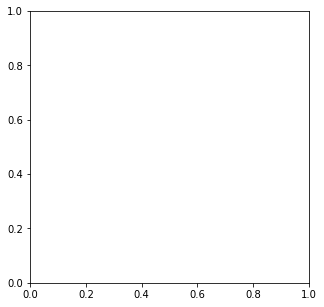

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies2, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .45, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, test_accuracies2, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .45, step=0.05))
plt.title("Test Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.show()

In [ ]:
while True:pass

# Encryption

In [ ]:
#RANDOM 
epsilons = [0.5]  #[0.2, 0.3, 0.4, 0.5, 0.6, 0.7]   #[0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.008, 0.005, 0.002 ]  
accuracies2 = []
examples2 = []
test_accuracies2 = []
test_examples2 = []
original_examples2 = []
attacked_examples2 = []

# Run train for each epsilon
acc, ex = training(25 , model, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

In [ ]:
acc, ex = training(20 , model, device, train_loader)
accuracies2.append(acc)
examples2.append(ex)
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

In [ ]:
model.eval()
def training_new(epochs, model, device, test_loader, epsilon):

    losses_g = []
    losses_d = []
    losses_g2 = []
    losses_md = []
    # Accuracy counter
    correct = 0
    adv_examples = []
    start_idx = 0
    # Loop over all examples in test set
    for epoch in range(epochs):
      generator.train()
      discriminator.train()
      correct = 0
      d_running_loss = 0.0
      g_running_loss = 0.0
      md_running_loss = 0.0
      g_running_loss2 = 0.0

      for batch in tqdm(test_loader):
        data, target = batch
        start_idx = start_idx+1
        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True 

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        # if init_pred.item() != target.item():
        #     continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        #Training GANs
        gen_image , d_loss , g_loss  , g_loss2 = train(perturbed_data , data , target)
        
        d_running_loss += d_loss
        g_running_loss += g_loss
        
        g_running_loss2 += g_loss2
        
        # Re-classify the perturbed image
        output = model(gen_image)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        final_pred.squeeze(1)
        for indx in range(len(final_pred)):
            if final_pred[indx].item() == target[indx].item():
                correct += 1
                # Special case for saving 0 epsilon examples
                if (epsilon == 0) and (len(adv_examples) < 5):
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )
            else:
                # Save some adv examples for visualization later
                if len(adv_examples) < 5:
                    adv_ex = gen_image[indx].squeeze().detach().cpu().numpy()
                    adv_examples.append( (init_pred[indx].item(), final_pred[indx].item(), adv_ex) )

    # Calculate final accuracy for this epsilon
      print('Epoch : {} , g_epoch_loss : {:.4f} , d_epoch_loss : {:.4f} , g_epoch_loss2 : {:.4f} , md_epoch_loss : {:.4f}'.format(epoch,g_running_loss/float(len(test_loader)),d_running_loss/float(len(test_loader)),g_running_loss/float(len(test_loader)),d_running_loss/float(len(test_loader))))

      final_acc = correct/float(sum([len(itm[1]) for itm in train_loader]))
      print("Epsilon: {}\tTraining Accuracy = {} / {} = {}".format(epsilon, correct, sum([len(itm[1]) for itm in train_loader]), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [ ]:
torch.save(discriminator.state_dict(), "Crypto_Random_Disc.pth")
torch.save(generator.state_dict(), "Crypto_Random_Gen.pth")

In [ ]:
def save_arr(arr, name):
    with open(name, 'wb') as f:
        pickle.dump(arr, f)

In [ ]:
#SAVE RANDOM

save_arr(accuracies2, "Crypto_Random_acc")
save_arr(examples2, "Crypto_Random_examples")
save_arr(test_accuracies2, "Crypto_Random_test_accuracies")
save_arr(test_examples2, "Crypto_Random_test_examples")
save_arr(original_examples2, "Crypto_Random_original_examples")
save_arr(attacked_examples2, "Crypto_Random_attacked_examples")

# Increasing

In [ ]:
discriminator = DNet()
generator = UNet(True)
generator.cuda()
discriminator.cuda()
g_optimizer = torch.optim.Adam(generator.parameters() , betas=(0.5,0.999) , lr = 0.0002)
d_optimizer = torch.optim.Adam(
    discriminator.parameters(), 
    betas=(0.5,0.999), 
    lr = 0.0002
)

In [ ]:
#Increasing
epsilons = [0.5]   #[0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.008, 0.005, 0.002 ]  
accuracies = []
examples = []
test_accuracies = []
test_examples = []
original_examples = []
attacked_examples = []

# Run train for each epsilon
for eps in epsilons:
    acc, ex = training_new(100 , model, device, train_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies.append(test_acc)
    test_examples.append(test_ex)
    original_examples.append(ori_ex)
    attacked_examples.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")


Epoch : 0 , g_epoch_loss : 2.7761 , d_epoch_loss : 0.9256 , g_epoch_loss2 : 2.7761 , md_epoch_loss : 0.9256
Epsilon: 0.5	Training Accuracy = 6721 / 50000 = 0.13442



Epoch : 1 , g_epoch_loss : 2.9850 , d_epoch_loss : 0.8983 , g_epoch_loss2 : 2.9850 , md_epoch_loss : 0.8983
Epsilon: 0.5	Training Accuracy = 6883 / 50000 = 0.13766



Epoch : 2 , g_epoch_loss : 2.5224 , d_epoch_loss : 0.9769 , g_epoch_loss2 : 2.5224 , md_epoch_loss : 0.9769
Epsilon: 0.5	Training Accuracy = 7408 / 50000 = 0.14816


In [ ]:
while True:pass

In [ ]:
#Increasing
epsilons = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]   #[0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.008, 0.005, 0.002 ]  
accuracies = []
examples = []
test_accuracies = []
test_examples = []
original_examples = []
attacked_examples = []

# Run train for each epsilon
for eps in epsilons:
    acc, ex = training_new(10 , model, device, train_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies.append(test_acc)
    test_examples.append(test_ex)
    original_examples.append(ori_ex)
    attacked_examples.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

In [ ]:
torch.save(discriminator.state_dict(), "Crypto_Increasing_Disc.pth")
torch.save(generator.state_dict(), "Crypto_Increasing_Gen.pth")

In [ ]:
#SAVE Increasing

save_arr(accuracies, "Crypto_Increasing_acc")
save_arr(examples, "Crypto_Increasing_examples")
save_arr(test_accuracies, "Crypto_Increasing_test_accuracies")
save_arr(test_examples, "Crypto_Increasing_test_examples")
save_arr(original_examples, "Crypto_Increasing_original_examples")
save_arr(attacked_examples, "Crypto_Increasing_attacked_examples")

In [ ]:
discriminator = DNet()
generator = UNet(True)
generator.cuda()
discriminator.cuda()
g_optimizer = torch.optim.Adam(generator.parameters() , betas=(0.5,0.999) , lr = 0.0002)
d_optimizer = torch.optim.Adam(
    discriminator.parameters(), 
    betas=(0.5,0.999), 
    lr = 0.0002
)

In [ ]:
#Decreasing
epsilons = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]   #[0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.008, 0.005, 0.002 ]  
accuracies1 = []
examples1 = []
test_accuracies1 = []
test_examples1 = []
original_examples1 = []
attacked_examples1 = []

# Run train for each epsilon
for eps in epsilons[::-1]:
    acc, ex = training_new(10 , model, device, train_loader, eps)
    accuracies1.append(acc)
    examples1.append(ex)
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies1.append(test_acc)
    test_examples1.append(test_ex)
    original_examples1.append(ori_ex)
    attacked_examples1.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")


Epoch : 0 , g_epoch_loss : 1.4113 , d_epoch_loss : 1.1306 , g_epoch_loss2 : 1.4113 , md_epoch_loss : 1.1306
Epsilon: 0.7	Training Accuracy = 35597 / 50000 = 0.71194



Epoch : 1 , g_epoch_loss : 1.4857 , d_epoch_loss : 1.1006 , g_epoch_loss2 : 1.4857 , md_epoch_loss : 1.1006
Epsilon: 0.7	Training Accuracy = 35867 / 50000 = 0.71734



Epoch : 2 , g_epoch_loss : 1.5004 , d_epoch_loss : 1.0867 , g_epoch_loss2 : 1.5004 , md_epoch_loss : 1.0867
Epsilon: 0.7	Training Accuracy = 36438 / 50000 = 0.72876



Epoch : 3 , g_epoch_loss : 1.4729 , d_epoch_loss : 1.0948 , g_epoch_loss2 : 1.4729 , md_epoch_loss : 1.0948
Epsilon: 0.7	Training Accuracy = 37200 / 50000 = 0.744



Epoch : 4 , g_epoch_loss : 1.5789 , d_epoch_loss : 1.0641 , g_epoch_loss2 : 1.5789 , md_epoch_loss : 1.0641
Epsilon: 0.7	Training Accuracy = 36710 / 50000 = 0.7342



Epoch : 5 , g_epoch_loss : 1.4390 , d_epoch_loss : 1.1222 , g_epoch_loss2 : 1.4390 , md_epoch_loss : 1.1222
Epsilon: 0.7	Training Accuracy = 37364 / 50000 = 0.74728



Epoch : 6 , g_epoch_loss : 1.4140 , d_epoch_loss : 1.1191 , g_epoch_loss2 : 1.4140 , md_epoch_loss : 1.1191
Epsilon: 0.7	Training Accuracy = 38232 / 50000 = 0.76464



Epoch : 7 , g_epoch_loss : 1.3867 , d_epoch_loss : 1.1415 , g_epoch_loss2 : 1.3867 , md_epoch_loss : 1.1415
Epsilon: 0.7	Training Accuracy = 38747 / 50000 = 0.77494



Epoch : 8 , g_epoch_loss : 1.3846 , d_epoch_loss : 1.1333 , g_epoch_loss2 : 1.3846 , md_epoch_loss : 1.1333
Epsilon: 0.7	Training Accuracy = 39350 / 50000 = 0.787



Epoch : 9 , g_epoch_loss : 1.3823 , d_epoch_loss : 1.1370 , g_epoch_loss2 : 1.3823 , md_epoch_loss : 1.1370
Epsilon: 0.7	Training Accuracy = 39549 / 50000 = 0.79098
##### TESTING ON ResNET 0.7 ########



Epsilon: 0.7	Test Accuracy by Resnet-18 = 6525 / 10000 = 0.6525
##### TESTING ON VGG 0.7 ########


RuntimeError: ignored

In [ ]:
while True:pass

In [ ]:
#Decreasing
epsilons =  [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  #[0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.008, 0.005, 0.002 ]  
accuracies1 = []
examples1 = []
test_accuracies1 = []
test_examples1 = []
original_examples1 = []
attacked_examples1 = []

# Run train for each epsilon
for eps in epsilons[::-1]:
    acc, ex = training_new(10 , model, device, train_loader, eps)
    accuracies1.append(acc)
    examples1.append(ex)
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies1.append(test_acc)
    test_examples1.append(test_ex)
    original_examples1.append(ori_ex)
    attacked_examples1.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

In [ ]:
#SAVE Decreasing
torch.save(discriminator.state_dict(), "Crypto_Decreasing_Disc.pth")
torch.save(generator.state_dict(), "Crypto_Decreasing_Gen.pth")
save_arr(accuracies1, "Crypto_Decreasing_acc")
save_arr(examples1, "Crypto_Decreasing_examples")
save_arr(test_accuracies1, "Crypto_Decreasing_test_accuracies")
save_arr(test_examples1, "Crypto_Decreasing_test_examples")
save_arr(original_examples1, "Crypto_Decreasing_original_examples")
save_arr(attacked_examples1, "Crypto_Decreasing_attacked_examples")

In [ ]:
#Test All
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

##### TESTING ON ResNET 0.2 ########



Epsilon: 0.2	Test Accuracy by Resnet-18 = 9380 / 10000 = 0.938
##### TESTING ON VGG 0.2 ########



Epsilon: 0.2	Test Accuracy by vgg-13 = 9325 / 10000 = 0.9325
######################################################
##### TESTING ON ResNET 0.3 ########



Epsilon: 0.3	Test Accuracy by Resnet-18 = 989 / 10000 = 0.0989
##### TESTING ON VGG 0.3 ########



Epsilon: 0.3	Test Accuracy by vgg-13 = 2132 / 10000 = 0.2132
######################################################
##### TESTING ON ResNET 0.4 ########



Epsilon: 0.4	Test Accuracy by Resnet-18 = 936 / 10000 = 0.0936
##### TESTING ON VGG 0.4 ########



Epsilon: 0.4	Test Accuracy by vgg-13 = 1219 / 10000 = 0.1219
######################################################
##### TESTING ON ResNET 0.5 ########



Epsilon: 0.5	Test Accuracy by Resnet-18 = 955 / 10000 = 0.0955
##### TESTING ON VGG 0.5 ########



Epsilon: 0.5	Test Accuracy by vgg-13 = 1061 / 10000 = 0.1061
######################################################
##### TESTING ON ResNET 0.6 ########



Epsilon: 0.6	Test Accuracy by Resnet-18 = 986 / 10000 = 0.0986
##### TESTING ON VGG 0.6 ########


KeyboardInterrupt: 

In [ ]:
for eps in epsilons:
    print("##### TESTING ON ResNET",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_res(model, device, test_loader, eps)
    test_accuracies2.append(test_acc)
    test_examples2.append(test_ex)
    original_examples2.append(ori_ex)
    attacked_examples2.append(attack_ex)
    print("##### TESTING ON VGG",eps,"########")
    test_acc, test_ex ,ori_ex ,attack_ex= testing_vgg(vgg, device, test_loader, eps)
    print("######################################################")

##### TESTING ON ResNET 0 ########



Epsilon: 0	Test Accuracy by Resnet-18 = 9063 / 10000 = 0.9063
##### TESTING ON VGG 0 ########



Epsilon: 0	Test Accuracy by vgg-13 = 9280 / 10000 = 0.928
######################################################
##### TESTING ON ResNET 0.002 ########



Epsilon: 0.002	Test Accuracy by Resnet-18 = 7722 / 10000 = 0.7722
##### TESTING ON VGG 0.002 ########



Epsilon: 0.002	Test Accuracy by vgg-13 = 8100 / 10000 = 0.81
######################################################
##### TESTING ON ResNET 0.005 ########



Epsilon: 0.005	Test Accuracy by Resnet-18 = 5381 / 10000 = 0.5381
##### TESTING ON VGG 0.005 ########



Epsilon: 0.005	Test Accuracy by vgg-13 = 6355 / 10000 = 0.6355
######################################################
##### TESTING ON ResNET 0.008 ########



Epsilon: 0.008	Test Accuracy by Resnet-18 = 3644 / 10000 = 0.3644
##### TESTING ON VGG 0.008 ########



Epsilon: 0.008	Test Accuracy by vgg-13 = 5496 / 10000 = 0.5496
######################################################
##### TESTING ON ResNET 0.01 ########



Epsilon: 0.01	Test Accuracy by Resnet-18 = 2849 / 10000 = 0.2849
##### TESTING ON VGG 0.01 ########



Epsilon: 0.01	Test Accuracy by vgg-13 = 5169 / 10000 = 0.5169
######################################################
##### TESTING ON ResNET 0.015 ########



Epsilon: 0.015	Test Accuracy by Resnet-18 = 1730 / 10000 = 0.173
##### TESTING ON VGG 0.015 ########



Epsilon: 0.015	Test Accuracy by vgg-13 = 4721 / 10000 = 0.4721
######################################################
##### TESTING ON ResNET 0.02 ########



Epsilon: 0.02	Test Accuracy by Resnet-18 = 1228 / 10000 = 0.1228
##### TESTING ON VGG 0.02 ########



Epsilon: 0.02	Test Accuracy by vgg-13 = 4471 / 10000 = 0.4471
######################################################


In [ ]:
import pickle
#attacked_examples, original_examples, test_examples
with open('attacked_examples_Increasing.pkl', 'wb') as f:
    pickle.dump(attacked_examples, f)
with open('original_examples_Increasing.pkl', 'wb') as f:
    pickle.dump(original_examples, f)
with open('test_examples_Increasing.pkl', 'wb') as f:
    pickle.dump(test_examples, f)
    

In [ ]:
# torch.save(generator.state_dict() , "generator_new_batch_reverse.pth")
# torch.save(discriminator.state_dict(), "discriminator_new_batch_reverse.pth")
# discriminator = DNet()
# generator = UNet(True)
# generator.cuda()
# discriminator.cuda()

"""
Forward :
Epsilon: 0.002	Test Accuracy = 8084 / 10000 = 0.8084
Epsilon: 0.005	Test Accuracy = 7791 / 10000 = 0.7791
Epsilon: 0.008	Test Accuracy = 7830 / 10000 = 0.783
Epsilon: 0.01	Test Accuracy = 7800 / 10000 = 0.78
Epsilon: 0.05	Test Accuracy = 8648 / 10000 = 0.8648
Epsilon: 0.1	Test Accuracy = 8767 / 10000 = 0.8767
Epsilon: 0.15	Test Accuracy = 9257 / 10000 = 0.9257
Epsilon: 0.2	Test Accuracy = 9192 / 10000 = 0.9192
Epsilon: 0.25	Test Accuracy = 9163 / 10000 = 0.9163
Epsilon: 0.3	Test Accuracy = 9341 / 10000 = 0.9341
Backward :
Epsilon: 0.3	Test Accuracy = 9597 / 10000 = 0.9597
Epsilon: 0.25	Test Accuracy = 9604 / 10000 = 0.9604
Epsilon: 0.2	Test Accuracy = 9671 / 10000 = 0.9671
Epsilon: 0.15	Test Accuracy = 9285 / 10000 = 0.9285
Epsilon: 0.1	Test Accuracy = 9227 / 10000 = 0.9227
Epsilon: 0.05	Test Accuracy = 8564 / 10000 = 0.8564
Epsilon: 0.01	Test Accuracy = 8035 / 10000 = 0.8035
Epsilon: 0.008	Test Accuracy = 8059 / 10000 = 0.8059
Epsilon: 0.005	Test Accuracy = 7964 / 10000 = 0.7964
Epsilon: 0.002	Test Accuracy = 8212 / 10000 = 0.8212
"""

In [ ]:
torch.save(generator.state_dict() , "generator_random.pth")
torch.save(discriminator.state_dict(), "discriminator_random.pth")
discriminator = DNet()
generator = UNet(True)
generator.cuda()
discriminator.cuda()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .45, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, test_accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .45, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()



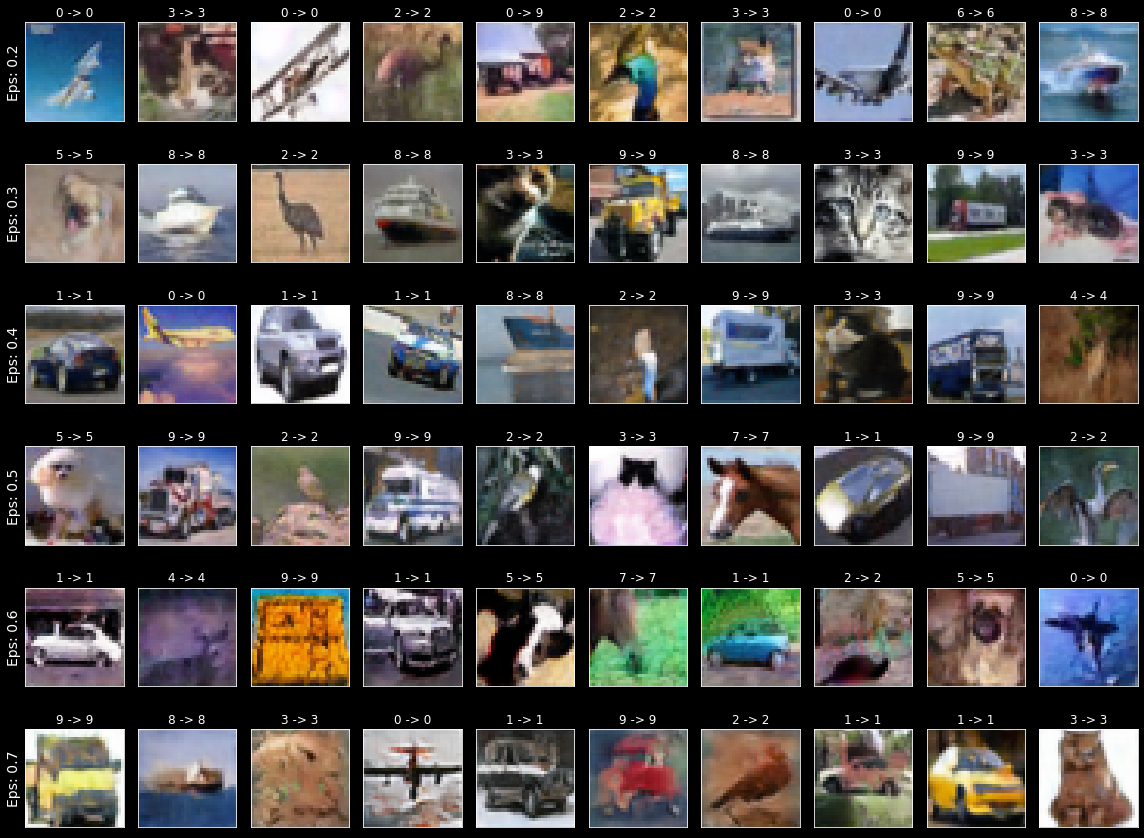

In [ ]:
# Plot several examples of adversarial samples at each epsilon
#GENERATED BY GAN
plt.style.use("dark_background")
cnt = 0
plt.figure(figsize=(16,12))
for i in range(len(epsilons)):
    for j in range(len(test_examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(test_examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = test_examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex.transpose(1,2,0))
plt.tight_layout()
plt.show()

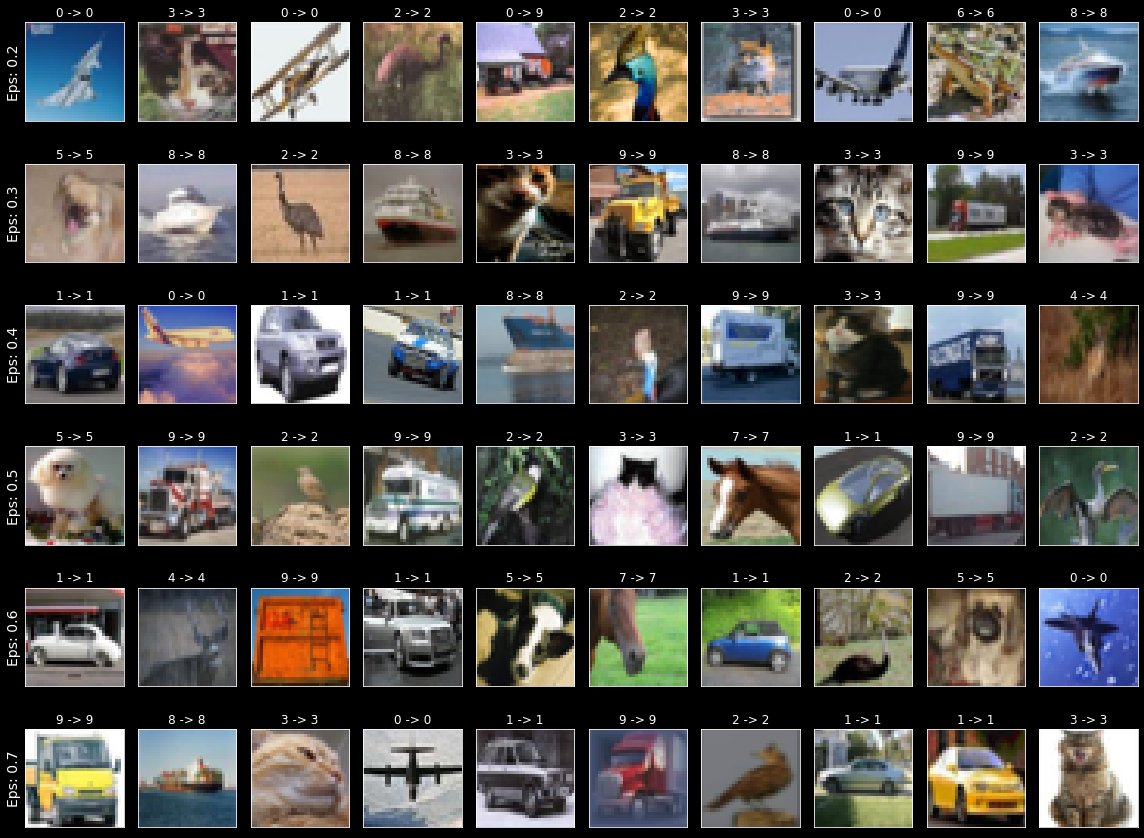

In [ ]:
# Plot several examples of adversarial samples at each epsilon
#Original
cnt = 0
plt.figure(figsize=(16,12))
for i in range(len(epsilons)):
    for j in range(len(original_examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(original_examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = original_examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex.transpose(1,2,0))
plt.tight_layout()
plt.show()

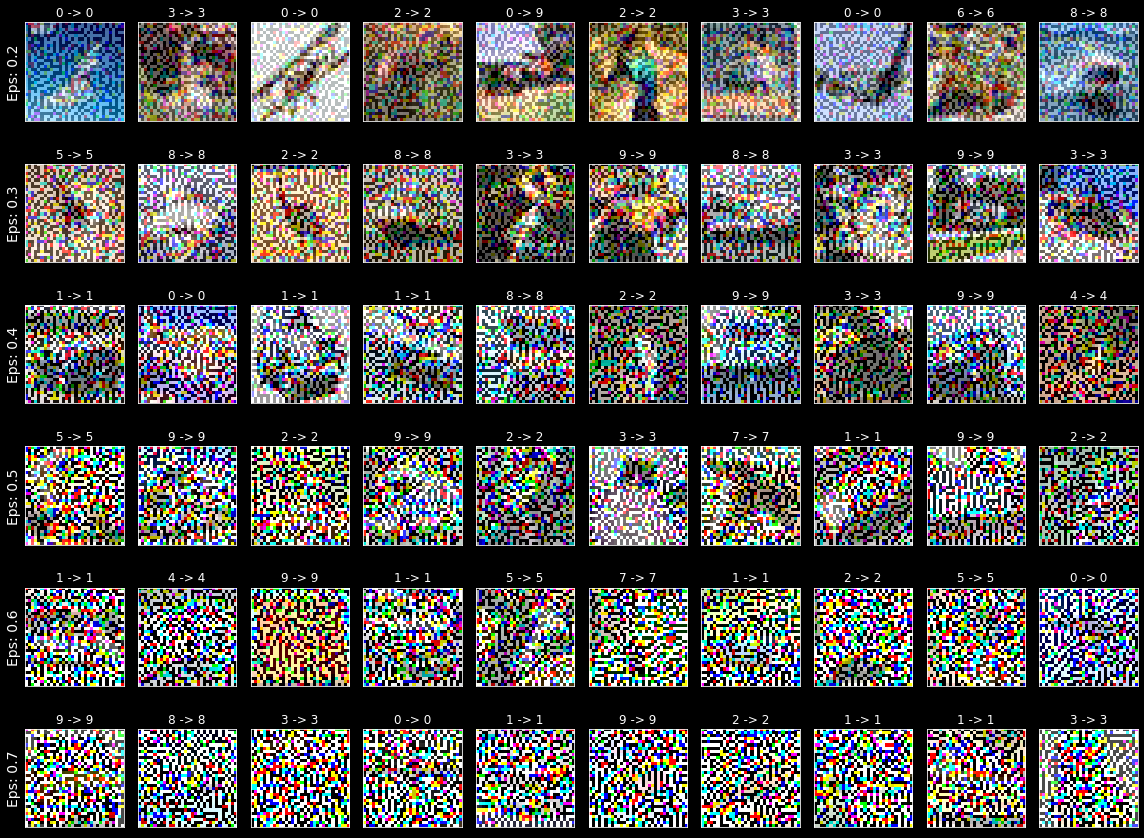

In [ ]:
# Plot several examples of adversarial samples at each epsilon
#ATTACKED
cnt = 0
plt.figure(figsize=(16,12))
for i in range(len(epsilons)):
    for j in range(len(attacked_examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(attacked_examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = attacked_examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        plt.imshow(ex.transpose(1,2,0))
plt.tight_layout()
plt.show()

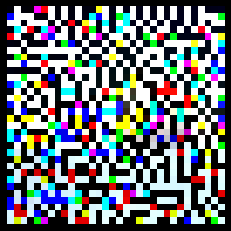

In [ ]:
plt.axis('off')
plt.imshow(attacked_examples[-1][1][2].transpose(1,2,0))
plt.savefig('a.jpg', dpi=1000)